<a href="https://colab.research.google.com/github/piyushyadav2233/pca.assisgnment-/blob/main/house_prices_advanced_regression_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import zipfile

# Specify the zip file path
zip_file_path = '/content/house-prices-advanced-regression-techniques.zip'

# Specify the CSV file within the zip you want to read
csv_file_name = 'train.csv'  # Change to 'test.csv' or other if needed

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the CSV file to memory
    with zip_ref.open(csv_file_name) as csv_file:
        # Read the CSV file using pandas
        df = pd.read_csv(csv_file)

# Now you can work with the dataframe 'df'
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
mean_sale_price = df['SalePrice'].mean()
median_sale_price = df['SalePrice'].median()
std_sale_price = df['SalePrice'].std()
min_sale_price = df['SalePrice'].min()
max_sale_price = df['SalePrice'].max()
print("Mean Sale Price:", mean_sale_price, "\nMedian Sale Price:", median_sale_price, "\nStandard Deviation of Sale Price:", std_sale_price, "\nMinimum Sale Price:", min_sale_price, "\nMaximum Sale Price:", max_sale_price)


Mean Sale Price: 180921.19589041095 
Median Sale Price: 163000.0 
Standard Deviation of Sale Price: 79442.50288288663 
Minimum Sale Price: 34900 
Maximum Sale Price: 755000


In [8]:
# Measures of Dispersion:
range_sale_price = max_sale_price - min_sale_price
print("Range of Sale Price:", range_sale_price)
print("Variance of Sale Price:", df['SalePrice'].var())
print("Coefficient of Variation (CV) of Sale Price:", (std_sale_price / mean_sale_price) * 100)


Range of Sale Price: 720100
Variance of Sale Price: 6311111264.297451
Coefficient of Variation (CV) of Sale Price: 43.910003187800726


In [9]:
#Interquartile Range (IQR): The difference between the 75th percentile (Q3) and the 25th percentile (Q1).
q1_sale_price = df['SalePrice'].quantile(0.25)
q3_sale_price = df['SalePrice'].quantile(0.75)
iqr_sale_price = q3_sale_price - q1_sale_price
print("Interquartile Range (IQR) of Sale Price:", iqr_sale_price)

Interquartile Range (IQR) of Sale Price: 84025.0


In [10]:
#Skewness and Kurtosis:
skewness_sale_price = df['SalePrice'].skew()
kurtosis_sale_price = df['SalePrice'].kurtosis()
print("Skewness of Sale Price:", skewness_sale_price)
print("Kurtosis of Sale Price:", kurtosis_sale_price)

Skewness of Sale Price: 1.8828757597682129
Kurtosis of Sale Price: 6.536281860064529


In [11]:
#Correlation:
correlation_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
Total

In [12]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
#Descriptive Statistics Part I
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [14]:
# Convert data into a pandas DataFrame for easy manipulation
df = pd.DataFrame(df)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [15]:
mean=df['SalePrice'].mean()
median=df['SalePrice'].median()
mode=df['SalePrice'].mode()
std=df['SalePrice'].std()
var=df['SalePrice'].var()
print("Mean:",mean)
print("Median:",median)
print("Mode:",mode)
print("Standard Deviation:",std)
print("Variance:",var)

Mean: 180921.19589041095
Median: 163000.0
Mode: 0    140000
Name: SalePrice, dtype: int64
Standard Deviation: 79442.50288288663
Variance: 6311111264.297451


In [16]:
df.duplicated().sum()

0

In [17]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [18]:
df.shape

(1460, 81)

In [19]:
#Calculate Measures of Dispersion
range_sale_price = df['SalePrice'].max() - df['SalePrice'].min()
print("Range of Sale Price:", range_sale_price)



Range of Sale Price: 720100


In [20]:
range_lot_area = df['LotArea'].max() - df['LotArea'].min()
print("Range of Lot Area:", range_lot_area)

Range of Lot Area: 213945


In [21]:
range_overall_qual = df['OverallQual'].max() - df['OverallQual'].min()
print("Range of Overall Quality:", range_overall_qual)

Range of Overall Quality: 9


In [22]:
range_year_built = df['YearBuilt'].max() - df['YearBuilt'].min()
print("Range of Year Built:", range_year_built)

Range of Year Built: 138


In [23]:
range_year_remod_add = df['YearRemodAdd'].max() - df['YearRemodAdd'].min()
print("Range of Year Remodel:", range_year_remod_add)

Range of Year Remodel: 60


In [24]:
range_total_bsmt_sf = df['TotalBsmtSF'].max() - df['TotalBsmtSF'].min()
print("Range of Total Basement Area:", range_total_bsmt_sf)

Range of Total Basement Area: 6110


In [25]:
range_1st_flr_sf = df['1stFlrSF'].max() - df['1stFlrSF'].min()
print("Range of First Floor Area:", range_1st_flr_sf)

Range of First Floor Area: 4358


In [26]:
range_2nd_flr_sf = df['2ndFlrSF'].max() - df['2ndFlrSF'].min()
print("Range of Second Floor Area:", range_2nd_flr_sf)

Range of Second Floor Area: 2065


In [27]:
range_gr_liv_area = df['GrLivArea'].max() - df['GrLivArea'].min()
print("Range of Above-Grade Living Area:", range_gr_liv_area)

Range of Above-Grade Living Area: 5308


In [28]:
# Calculate Skewness and Kurtosis
skewness_sale_price = df['SalePrice'].skew()
kurtosis_sale_price = df['SalePrice'].kurtosis()
print("Skewness of Sale Price:", skewness_sale_price)
print("Kurtosis of Sale Price:", kurtosis_sale_price)



Skewness of Sale Price: 1.8828757597682129
Kurtosis of Sale Price: 6.536281860064529


In [29]:
#Mean: Average value of the dataset.
#Median: Middle value when the data is sorted.
#Mode: Most frequent value in the dataset.
#Range: Difference between the maximum and minimum values.
#Variance: Measure of how much the data points differ from the mean.
#tandard Deviation: Square root of variance, showing how spread out the data is.

In [30]:
#Quartiles
q1_sale_price = df['SalePrice'].quantile(0.25)
q2_sale_price = df['SalePrice'].quantile(0.50)
q3_sale_price = df['SalePrice'].quantile(0.75)
print("First Quartile (Q1) of Sale Price:", q1_sale_price)
print("Second Quartile (Q2) of Sale Price:", q2_sale_price)
print("Third Quartile (Q3) of Sale Price:", q3_sale_price)

First Quartile (Q1) of Sale Price: 129975.0
Second Quartile (Q2) of Sale Price: 163000.0
Third Quartile (Q3) of Sale Price: 214000.0


In [31]:
#Interquartile Range (IQR)
iqr_sale_price = q3_sale_price - q1_sale_price
print("Interquartile Range (IQR) of Sale Price:", iqr_sale_price)

Interquartile Range (IQR) of Sale Price: 84025.0


In [32]:
#First Quartile (Q1): The median of the lower half of the data (25th percentile).
#Second Quartile (Q2): The median of the entire dataset (50th percentile).
#Third Quartile (Q3): The median of the upper half of the data (75th percentile).
#Interquartile Range (IQR): The difference between Q3 and Q1, which measures the spread of the middle 50% of the data.

In [33]:
#Descriptive Statistics Part 2
#1. Skewness:Skewness indicates whether a data distribution is symmetrical. A skewness value close to 0 suggests a symmetric distribution:
#Positive skew: The right tail is longer (right-skewed).
#Negative skew: The left tail is longer (left-skewed).

skew=df['SalePrice'].skew()
print("Skewness:",skew)


Skewness: 1.8828757597682129


In [34]:
kurtosis_sale_price=df['SalePrice'].kurtosis()
print("Kurtosis:",kurtosis_sale_price)

Kurtosis: 6.536281860064529


<Axes: ylabel='SalePrice'>

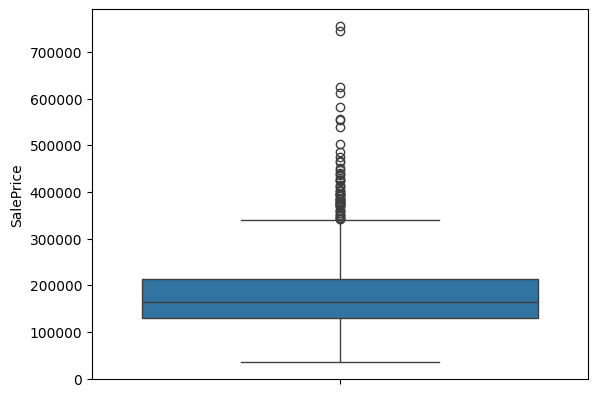

In [35]:
#boxplot
sns.boxplot(df['SalePrice'])

<Axes: ylabel='LotArea'>

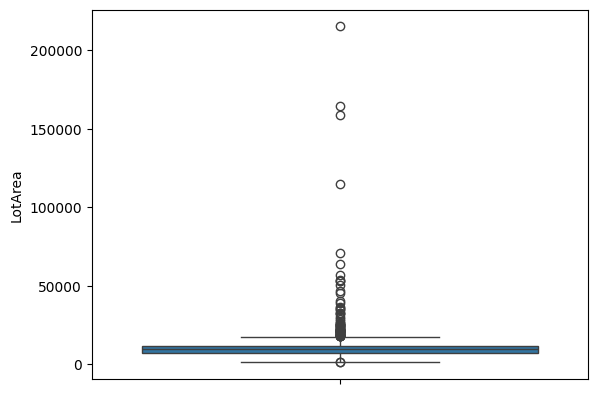

In [36]:
sns.boxplot(df['LotArea'])

<Axes: ylabel='OverallQual'>

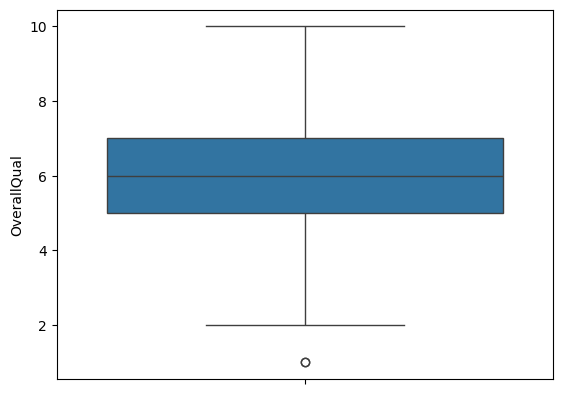

In [37]:
sns.boxplot(df['OverallQual'])

<Axes: ylabel='YearBuilt'>

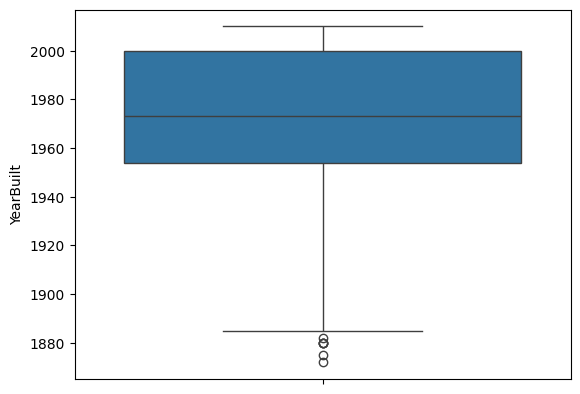

In [38]:
sns.boxplot(df['YearBuilt'])

<Axes: ylabel='YearRemodAdd'>

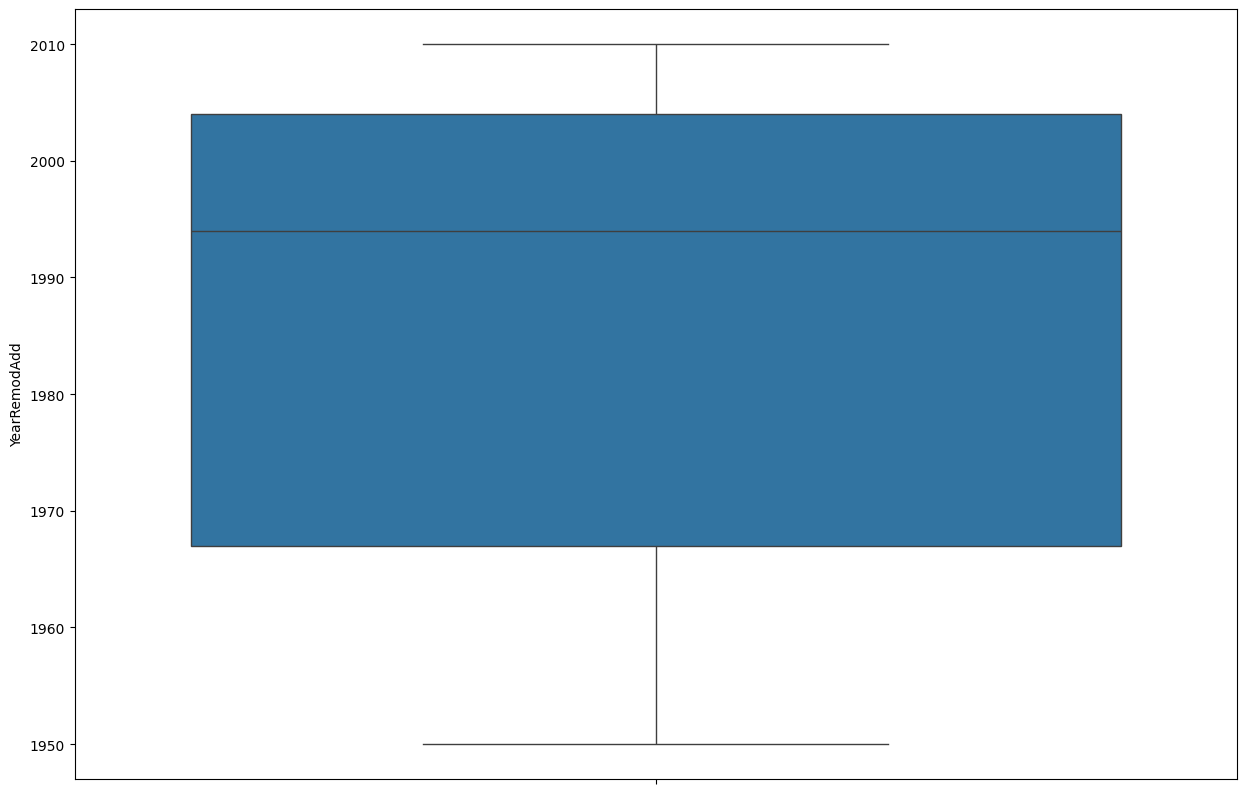

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(df['YearRemodAdd'])

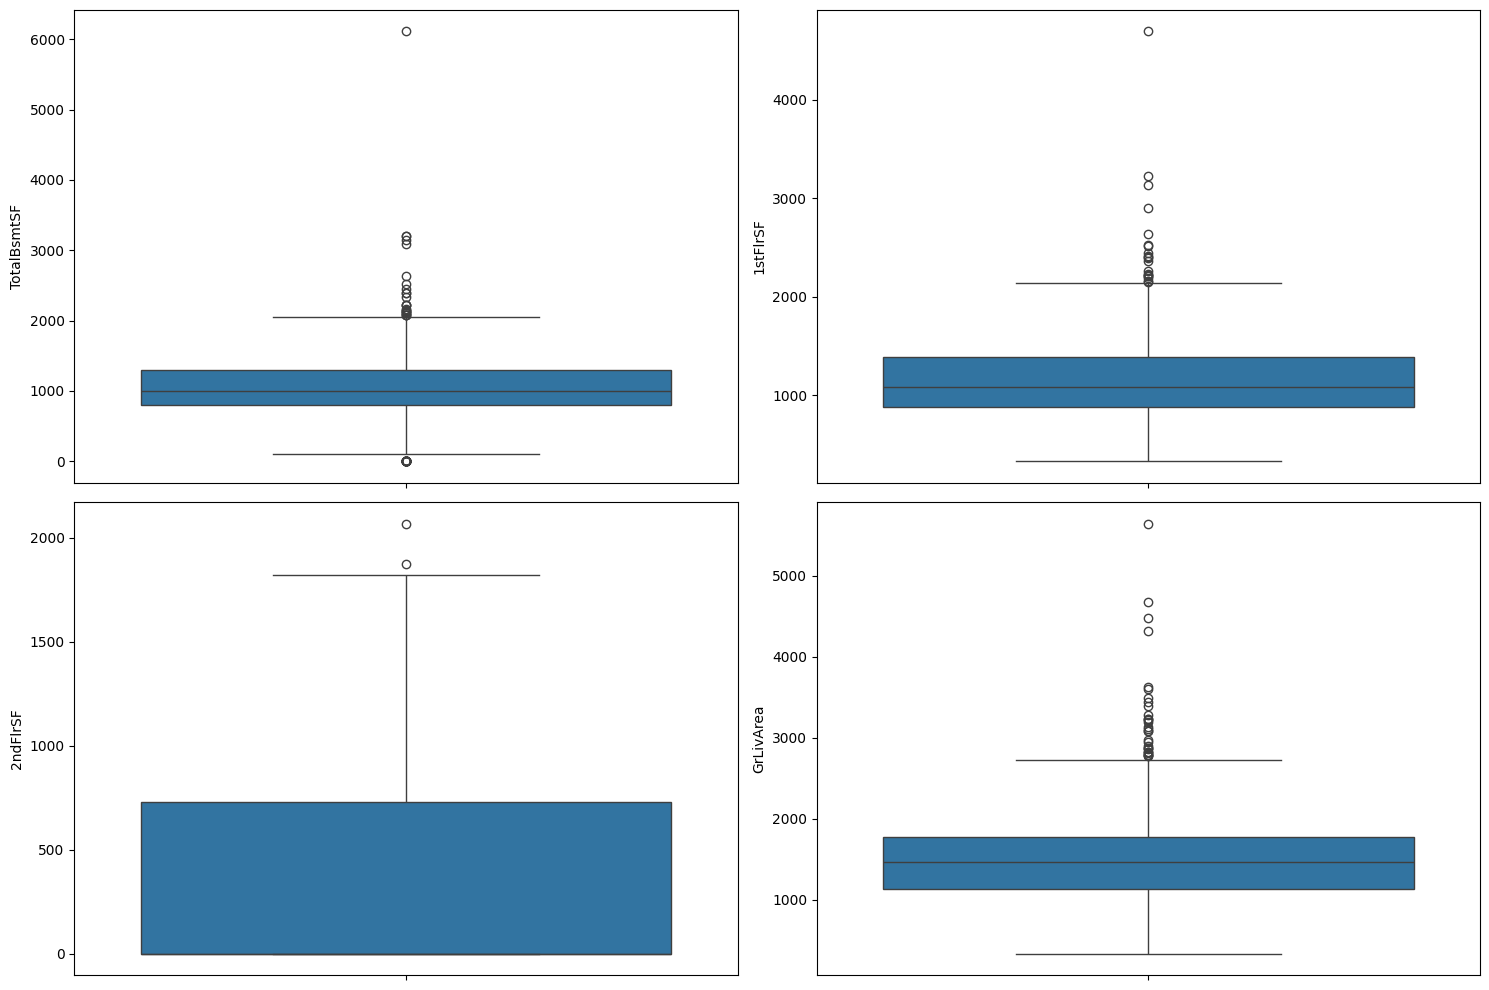

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(df['TotalBsmtSF'], ax=axs[0, 0])
sns.boxplot(df['1stFlrSF'], ax=axs[0, 1])
sns.boxplot(df['2ndFlrSF'], ax=axs[1, 0])
sns.boxplot(df['GrLivArea'], ax=axs[1, 1])
plt.tight_layout()

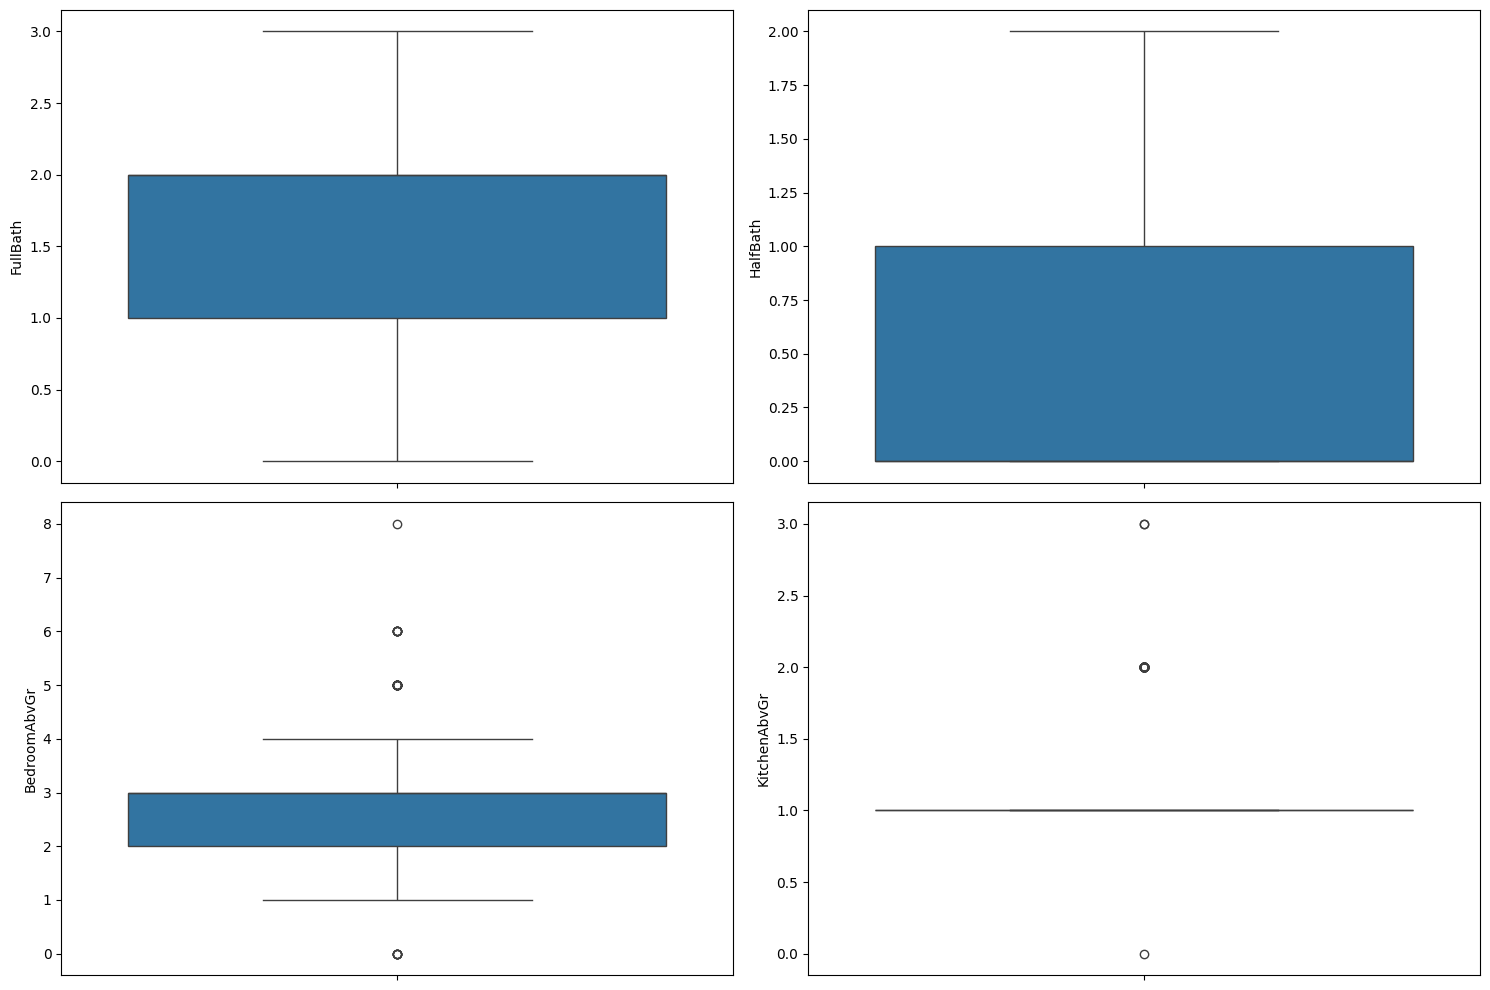

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(df['FullBath'], ax=axs[0, 0])
sns.boxplot(df['HalfBath'], ax=axs[0, 1])
sns.boxplot(df['BedroomAbvGr'], ax=axs[1, 0])
sns.boxplot(df['KitchenAbvGr'], ax=axs[1, 1])
plt.tight_layout()

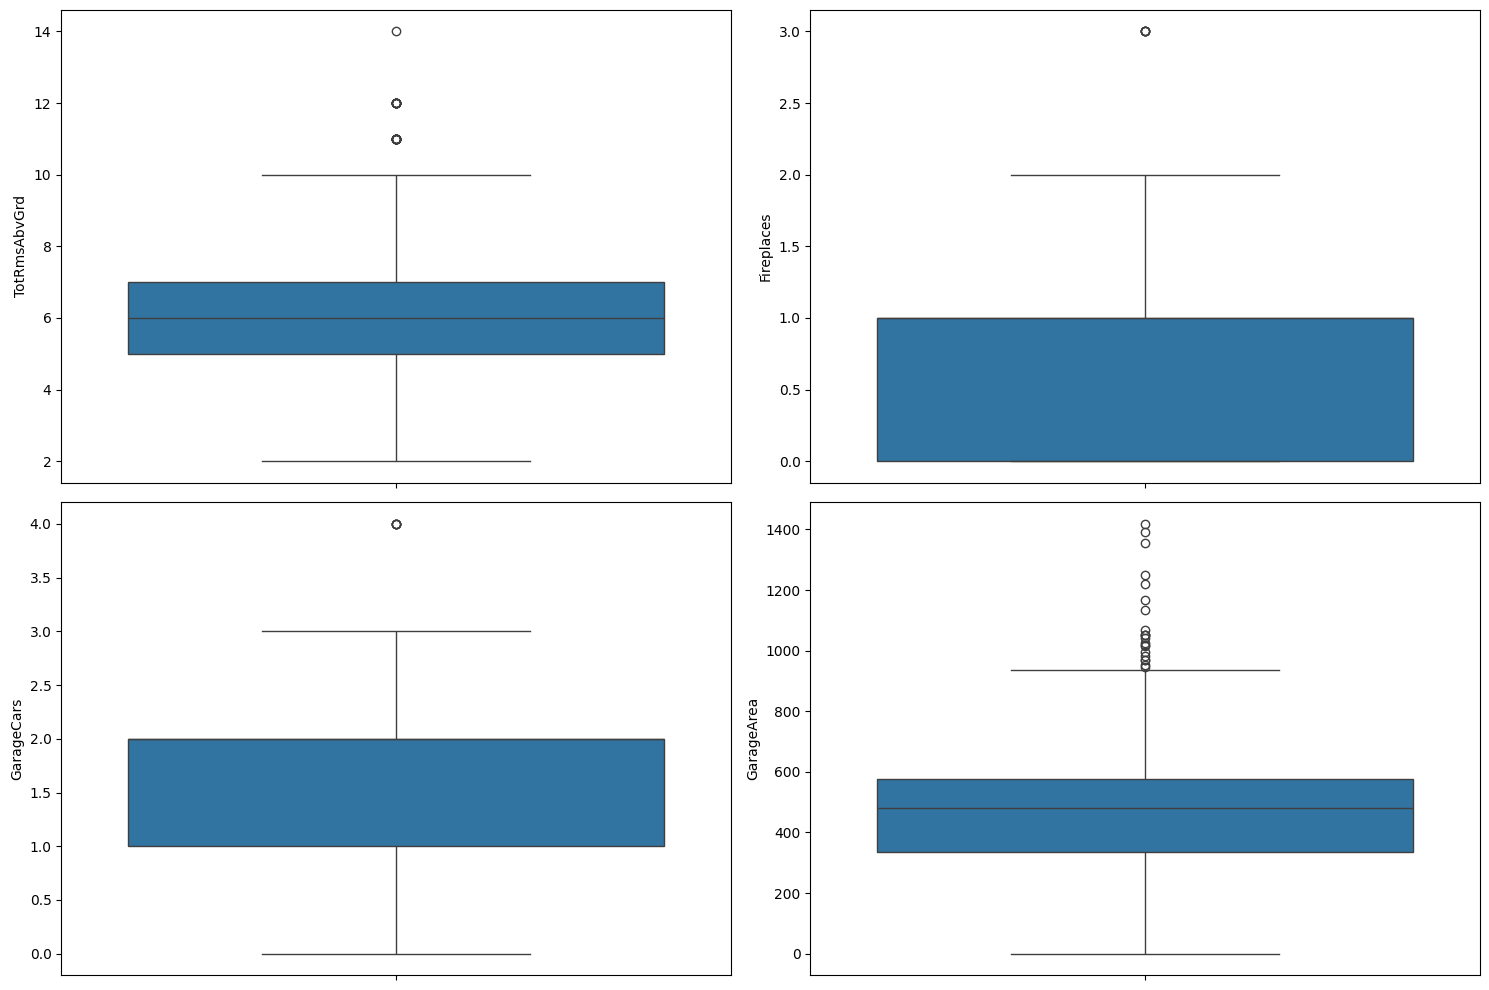

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(df['TotRmsAbvGrd'], ax=axs[0, 0])
sns.boxplot(df['Fireplaces'], ax=axs[0, 1])
sns.boxplot(df['GarageCars'], ax=axs[1, 0])
sns.boxplot(df['GarageArea'], ax=axs[1, 1])
plt.tight_layout()



In [43]:
#Effects of Linear Transformations:
## Define a linear transformation function
def linear_transform(x, a, b):
    return a * x + b



In [44]:
# Apply the transformation to 'SalePrice'
a = 2  # Scaling factor
b = 10000  # Shift factor
df['TransformedSalePrice'] = df['SalePrice'].apply(lambda x: linear_transform(x, a, b))
df[['SalePrice', 'TransformedSalePrice']].head()

SalePrice  TransformedSalePrice
0     208500                427000
1     181500                373000
2     223500                457000
3     140000                290000
4     250000                510000

<Axes: ylabel='TransformedSalePrice'>

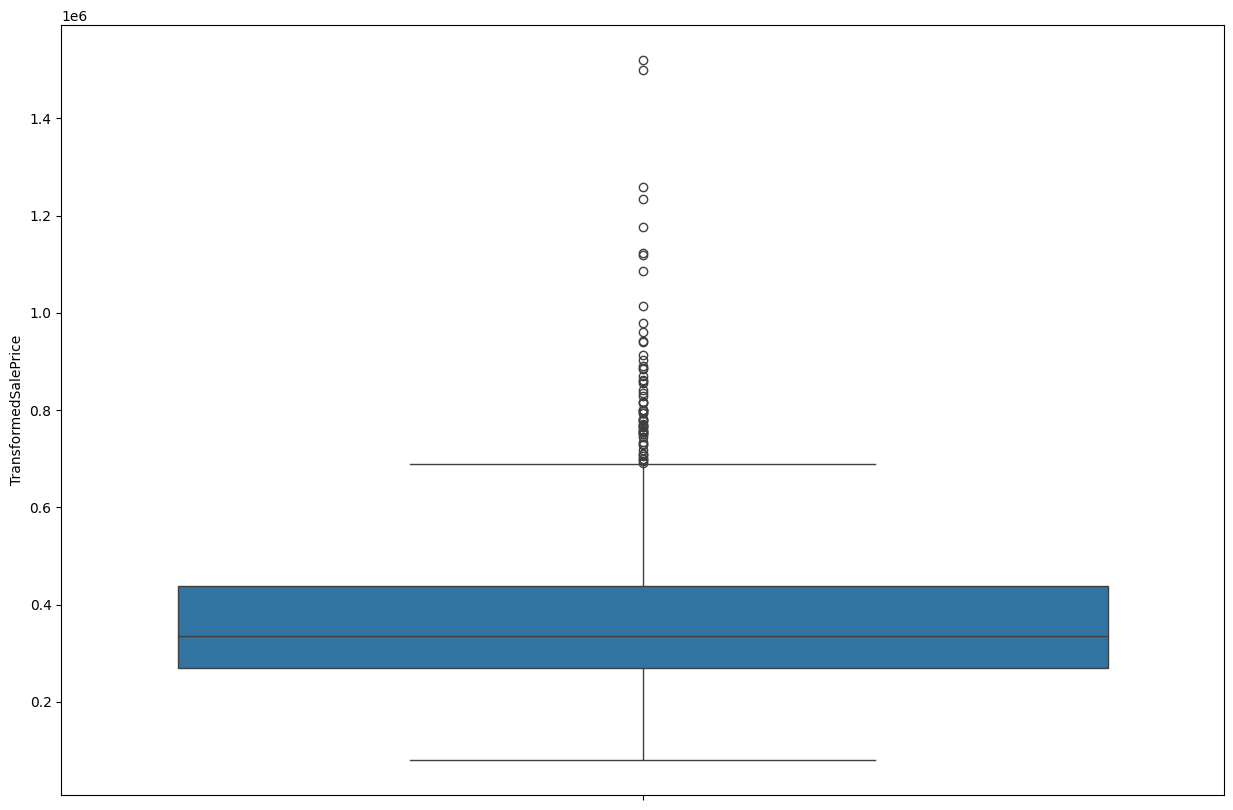

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(df['TransformedSalePrice'])


<Axes: xlabel='TransformedSalePrice', ylabel='Count'>

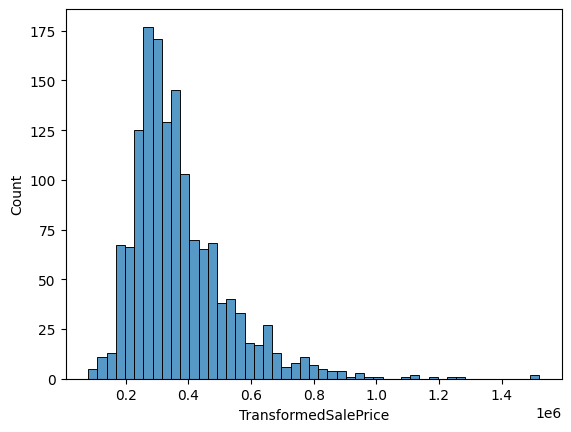

In [46]:
sns.histplot(df['TransformedSalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

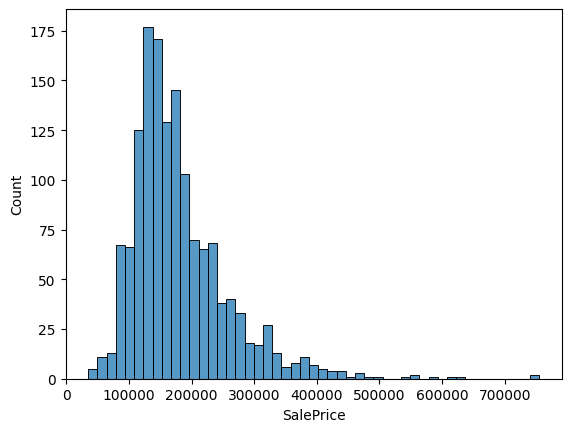

In [47]:
sns.histplot(df['SalePrice'])

<Axes: xlabel='LotArea', ylabel='Count'>

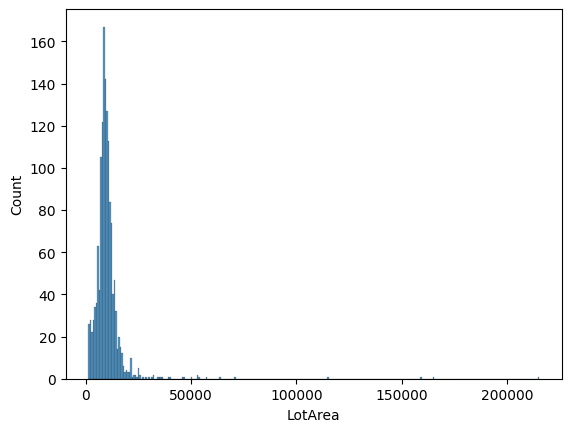

In [48]:
sns.histplot(df['LotArea'])

<Axes: xlabel='OverallQual', ylabel='Count'>

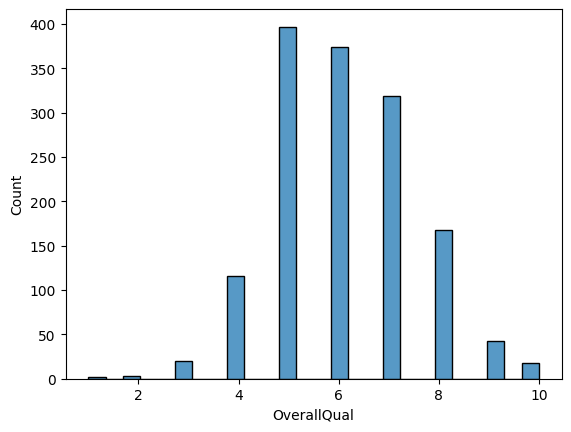

In [49]:
sns.histplot(df['OverallQual'])

In [50]:
#zscore
from scipy.stats import zscore
df['zscore_SalePrice'] = zscore(df['SalePrice'])
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ...  Fence MiscFeature MiscVal MoSold YrSold  \
0            Lvl    AllPub  ...    NaN         NaN       0      2   2008   
1            Lvl    AllPub  ...    NaN         NaN       0      5   2007   
2            Lvl    AllPub  ...    NaN         NaN       0      9   2008   
3            Lvl    AllPub  ...    NaN         NaN       0      2   2006   
4            Lvl    AllPub  ...    NaN         NaN       0     12   2008   
...          ...       ...  ...    ...         ...     ...    ...    ...   
1455         Lvl    AllPub  ...    NaN         NaN       0      8   2007   
1456         Lvl    AllPub  ...  MnPrv         NaN       0      2   2010   
1457         Lvl    AllPub  ...  GdPrv        Shed    2500      5   2010   
1458         Lvl    AllPub  ...    NaN         NaN       0      4   2010   
1459         Lvl    AllPub  ...    NaN         NaN       0      6   2008   

     SaleType SaleCondition  SalePrice  TransformedSalePrice  zscore_SalePrice  
0          WD        Normal     208500                427000          0.347273  
1          WD        Normal     181500                373000          0.007288  
2          WD        Normal     223500                457000          0.536154  
3          WD       Abnorml     140000                290000         -0.515281  
4          WD        Normal     250000                510000          0.869843  
...       ...           ...        ...                   ...               ...  
1455       WD        Normal     175000                360000         -0.074560  
1456       WD        Normal     210000                430000          0.366161  
1457       WD        Normal     266500                543000          1.077611  
1458       WD        Normal     142125                294250         -0.488523  
1459       WD        Normal     147500                305000         -0.420841  

[1460 rows x 83 columns]

In [51]:
df['zscore_SalePrice'].describe()

count    1.460000e+03
mean     1.362685e-16
std      1.000343e+00
min     -1.838704e+00
25%     -6.415162e-01
50%     -2.256643e-01
75%      4.165294e-01
max      7.228819e+00
Name: zscore_SalePrice, dtype: float64

In [52]:
df['zscore_SalePrice'].skew()

1.8828757597682124

In [53]:
df['zscore_SalePrice'].kurtosis()

6.536281860064529

<Axes: >

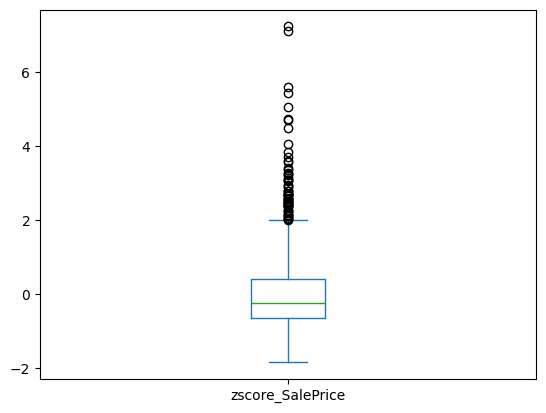

In [54]:
df['zscore_SalePrice'].plot(kind='box')

In [55]:
df['zscore_SalePrice'].skew()

1.8828757597682124

In [56]:
#Chebyshev's Rule
threshold=3
print(df['zscore_SalePrice'][np.abs(df['zscore_SalePrice'])>threshold])

58      3.246967
178     4.040982
185     3.703050
349     3.226492
389     3.086040
440     4.710413
473     3.262329
496     3.136409
527     3.341168
591     3.412804
664     3.048264
691     7.228819
769     4.496348
798     3.828970
803     5.062146
898     5.423840
1046    4.730321
1142    3.071811
1169    5.591855
1182    7.102899
1243    3.577130
1373    3.596018
Name: zscore_SalePrice, dtype: float64


In [57]:
mean=df['zscore_SalePrice'].mean()
std=df['zscore_SalePrice'].std()
print(mean,std)

1.3626846987180004e-16 1.0003426417780876


In [58]:
#Define k (number of standard deviations):
k = 3

# Calculate the lower and upper bounds for outliers
lower_bound = mean - k * std
upper_bound = mean + k * std
print(lower_bound,upper_bound)

-3.001027925334263 3.001027925334263


In [59]:
# Count the number of data points within the range
count_within_range = ((df['zscore_SalePrice'] >= lower_bound) & (df['zscore_SalePrice'] <= upper_bound)).sum()
count_within_range

1438

In [60]:
# Print the results
print(f"Number of data points within {k} standard deviations of the mean: {count_within_range}")
print(f"Number of data points outside the range: {len(df['zscore_SalePrice']) - count_within_range}")
print(f"Percentage of data points outside the range: {(len(df['zscore_SalePrice']) - count_within_range) / len(df['zscore_SalePrice']) * 100:.2f}%")

Number of data points within 3 standard deviations of the mean: 1438
Number of data points outside the range: 22
Percentage of data points outside the range: 1.51%


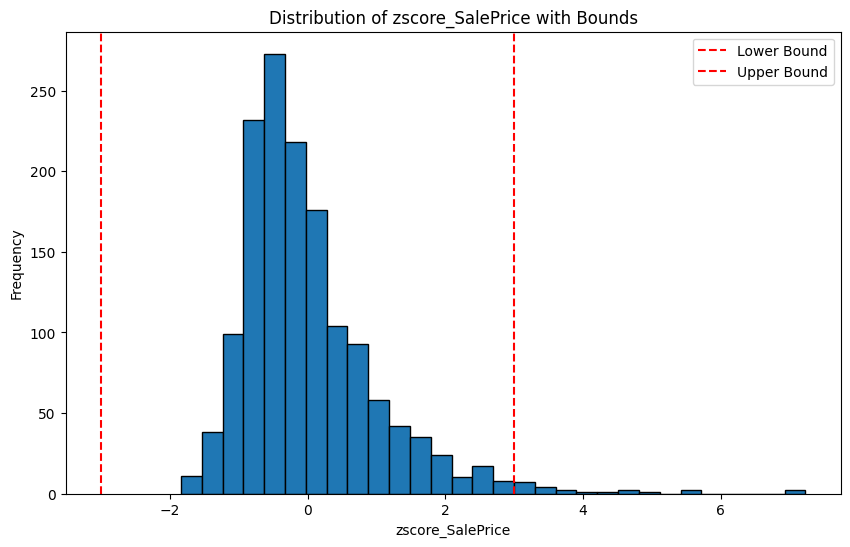

In [61]:
# Plot the data and the bounds
plt.figure(figsize=(10, 6))
plt.hist(df['zscore_SalePrice'], bins=30, edgecolor='k')
plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.xlabel('zscore_SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of zscore_SalePrice with Bounds')
plt.legend()
plt.show()

In [62]:
# Pearson's Correlation Coefficient
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

Id  MSSubClass  LotFrontage   LotArea  \
Id                    1.000000    0.011156    -0.010601 -0.033226   
MSSubClass            0.011156    1.000000    -0.386347 -0.139781   
LotFrontage          -0.010601   -0.386347     1.000000  0.426095   
LotArea              -0.033226   -0.139781     0.426095  1.000000   
OverallQual          -0.028365    0.032628     0.251646  0.105806   
OverallCond           0.012609   -0.059316    -0.059213 -0.005636   
YearBuilt            -0.012713    0.027850     0.123349  0.014228   
YearRemodAdd         -0.021998    0.040581     0.088866  0.013788   
MasVnrArea           -0.050298    0.022936     0.193458  0.104160   
BsmtFinSF1           -0.005024   -0.069836     0.233633  0.214103   
BsmtFinSF2           -0.005968   -0.065649     0.049900  0.111170   
BsmtUnfSF            -0.007940   -0.140759     0.132644 -0.002618   
TotalBsmtSF          -0.015415   -0.238518     0.392075  0.260833   
1stFlrSF              0.010496   -0.251758     0.457181  0.299475   
2ndFlrSF              0.005590    0.307886     0.080177  0.050986   
LowQualFinSF         -0.044230    0.046474     0.038469  0.004779   
GrLivArea             0.008273    0.074853     0.402797  0.263116   
BsmtFullBath          0.002289    0.003491     0.100949  0.158155   
BsmtHalfBath         -0.020155   -0.002333    -0.007234  0.048046   
FullBath              0.005587    0.131608     0.198769  0.126031   
HalfBath              0.006784    0.177354     0.053532  0.014259   
BedroomAbvGr          0.037719   -0.023438     0.263170  0.119690   
KitchenAbvGr          0.002951    0.281721    -0.006069 -0.017784   
TotRmsAbvGrd          0.027239    0.040380     0.352096  0.190015   
Fireplaces           -0.019772   -0.045569     0.266639  0.271364   
GarageYrBlt           0.000072    0.085072     0.070250 -0.024947   
GarageCars            0.016570   -0.040110     0.285691  0.154871   
GarageArea            0.017634   -0.098672     0.344997  0.180403   
WoodDeckSF           -0.029643   -0.012579     0.088521  0.171698   
OpenPorchSF          -0.000477   -0.006100     0.151972  0.084774   
EnclosedPorch         0.002889   -0.012037     0.010700 -0.018340   
3SsnPorch            -0.046635   -0.043825     0.070029  0.020423   
ScreenPorch           0.001330   -0.026030     0.041383  0.043160   
PoolArea              0.057044    0.008283     0.206167  0.077672   
MiscVal              -0.006242   -0.007683     0.003368  0.038068   
MoSold                0.021172   -0.013585     0.011200  0.001205   
YrSold                0.000712   -0.021407     0.007450 -0.014261   
SalePrice            -0.021917   -0.084284     0.351799  0.263843   
TransformedSalePrice -0.021917   -0.084284     0.351799  0.263843   
zscore_SalePrice     -0.021917   -0.084284     0.351799  0.263843   

                      OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                      -0.028365     0.012609  -0.012713     -0.021998   
MSSubClass               0.032628    -0.059316   0.027850      0.040581   
LotFrontage              0.251646    -0.059213   0.123349      0.088866   
LotArea                  0.105806    -0.005636   0.014228      0.013788   
OverallQual              1.000000    -0.091932   0.572323      0.550684   
OverallCond             -0.091932     1.000000  -0.375983      0.073741   
YearBuilt                0.572323    -0.375983   1.000000      0.592855   
YearRemodAdd             0.550684     0.073741   0.592855      1.000000   
MasVnrArea               0.411876    -0.128101   0.315707      0.179618   
BsmtFinSF1               0.239666    -0.046231   0.249503      0.128451   
BsmtFinSF2              -0.059119     0.040229  -0.049107     -0.067759   
BsmtUnfSF                0.308159    -0.136841   0.149040      0.181133   
TotalBsmtSF              0.537808    -0.171098   0.391452      0.291066   
1stFlrSF                 0.476224    -0.144203   0.281986      0.240379   
2ndFlrSF                 0.295493     0.028942   0.010308      0.140024  

In [63]:
correlation_matrix['SalePrice'].sort_values(ascending=False, key=abs, na_position='last')

TransformedSalePrice    1.000000
SalePrice               1.000000
zscore_SalePrice        1.000000
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
FullBath                0.560664
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
YearRemodAdd            0.507101
GarageYrBlt             0.486362
MasVnrArea              0.477493
Fireplaces              0.466929
BsmtFinSF1              0.386420
LotFrontage             0.351799
WoodDeckSF              0.324413
2ndFlrSF                0.319334
OpenPorchSF             0.315856
HalfBath                0.284108
LotArea                 0.263843
BsmtFullBath            0.227122
BsmtUnfSF               0.214479
BedroomAbvGr            0.168213
KitchenAbvGr           -0.135907
EnclosedPorch          -0.128578
ScreenPorch             0.111447
PoolArea                0.092404
MSSubClass             -0.084284
OverallCond            -0.077856
MoSold                  0.046432
3SsnPorch               0.044584
YrSold                 -0.028923
LowQualFinSF           -0.025606
Id                     -0.021917
MiscVal                -0.021190
BsmtHalfBath           -0.016844
BsmtFinSF2             -0.011378
Name: SalePrice, dtype: float64

In [64]:
correlation_matrix['SalePrice']=correlation_matrix['SalePrice'].sort_values(ascending=False, key=abs, na_position='last')
correlation_matrix

Id  MSSubClass  LotFrontage   LotArea  \
Id                    1.000000    0.011156    -0.010601 -0.033226   
MSSubClass            0.011156    1.000000    -0.386347 -0.139781   
LotFrontage          -0.010601   -0.386347     1.000000  0.426095   
LotArea              -0.033226   -0.139781     0.426095  1.000000   
OverallQual          -0.028365    0.032628     0.251646  0.105806   
OverallCond           0.012609   -0.059316    -0.059213 -0.005636   
YearBuilt            -0.012713    0.027850     0.123349  0.014228   
YearRemodAdd         -0.021998    0.040581     0.088866  0.013788   
MasVnrArea           -0.050298    0.022936     0.193458  0.104160   
BsmtFinSF1           -0.005024   -0.069836     0.233633  0.214103   
BsmtFinSF2           -0.005968   -0.065649     0.049900  0.111170   
BsmtUnfSF            -0.007940   -0.140759     0.132644 -0.002618   
TotalBsmtSF          -0.015415   -0.238518     0.392075  0.260833   
1stFlrSF              0.010496   -0.251758     0.457181  0.299475   
2ndFlrSF              0.005590    0.307886     0.080177  0.050986   
LowQualFinSF         -0.044230    0.046474     0.038469  0.004779   
GrLivArea             0.008273    0.074853     0.402797  0.263116   
BsmtFullBath          0.002289    0.003491     0.100949  0.158155   
BsmtHalfBath         -0.020155   -0.002333    -0.007234  0.048046   
FullBath              0.005587    0.131608     0.198769  0.126031   
HalfBath              0.006784    0.177354     0.053532  0.014259   
BedroomAbvGr          0.037719   -0.023438     0.263170  0.119690   
KitchenAbvGr          0.002951    0.281721    -0.006069 -0.017784   
TotRmsAbvGrd          0.027239    0.040380     0.352096  0.190015   
Fireplaces           -0.019772   -0.045569     0.266639  0.271364   
GarageYrBlt           0.000072    0.085072     0.070250 -0.024947   
GarageCars            0.016570   -0.040110     0.285691  0.154871   
GarageArea            0.017634   -0.098672     0.344997  0.180403   
WoodDeckSF           -0.029643   -0.012579     0.088521  0.171698   
OpenPorchSF          -0.000477   -0.006100     0.151972  0.084774   
EnclosedPorch         0.002889   -0.012037     0.010700 -0.018340   
3SsnPorch            -0.046635   -0.043825     0.070029  0.020423   
ScreenPorch           0.001330   -0.026030     0.041383  0.043160   
PoolArea              0.057044    0.008283     0.206167  0.077672   
MiscVal              -0.006242   -0.007683     0.003368  0.038068   
MoSold                0.021172   -0.013585     0.011200  0.001205   
YrSold                0.000712   -0.021407     0.007450 -0.014261   
SalePrice            -0.021917   -0.084284     0.351799  0.263843   
TransformedSalePrice -0.021917   -0.084284     0.351799  0.263843   
zscore_SalePrice     -0.021917   -0.084284     0.351799  0.263843   

                      OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                      -0.028365     0.012609  -0.012713     -0.021998   
MSSubClass               0.032628    -0.059316   0.027850      0.040581   
LotFrontage              0.251646    -0.059213   0.123349      0.088866   
LotArea                  0.105806    -0.005636   0.014228      0.013788   
OverallQual              1.000000    -0.091932   0.572323      0.550684   
OverallCond             -0.091932     1.000000  -0.375983      0.073741   
YearBuilt                0.572323    -0.375983   1.000000      0.592855   
YearRemodAdd             0.550684     0.073741   0.592855      1.000000   
MasVnrArea               0.411876    -0.128101   0.315707      0.179618   
BsmtFinSF1               0.239666    -0.046231   0.249503      0.128451   
BsmtFinSF2              -0.059119     0.040229  -0.049107     -0.067759   
BsmtUnfSF                0.308159    -0.136841   0.149040      0.181133   
TotalBsmtSF              0.537808    -0.171098   0.391452      0.291066   
1stFlrSF                 0.476224    -0.144203   0.281986      0.240379   
2ndFlrSF                 0.295493     0.028942   0.010308      0.140024  

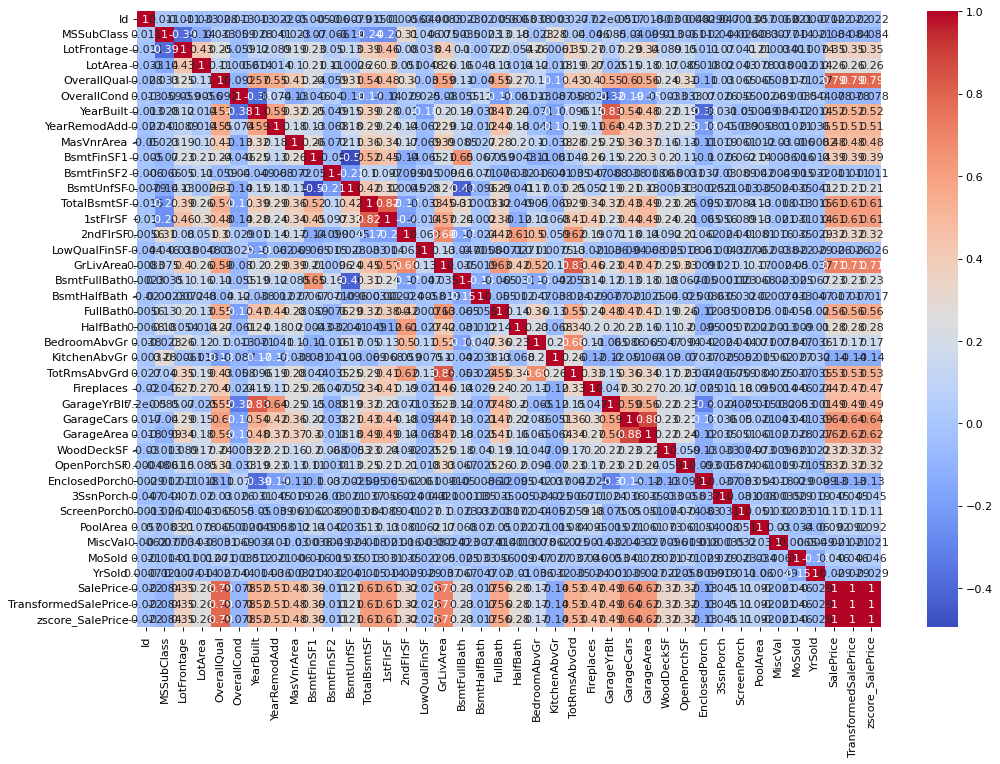

In [65]:
#plot
plt.figure(figsize=(15,10), dpi=80, facecolor='w', edgecolor='k', frameon=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [66]:
## Spearman's Rank Correlation
numeric_df = df.select_dtypes(include=np.number)
numeric_df

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  EnclosedPorch  \
0          2003          2003       196.0         706  ...              0   
1          1976          1976         0.0         978  ...              0   
2          2001          2002       162.0         486  ...              0   
3          1915          1970         0.0         216  ...            272   
4          2000          2000       350.0         655  ...              0   
...         ...           ...         ...         ...  ...            ...   
1455       1999          2000         0.0           0  ...              0   
1456       1978          1988       119.0         790  ...              0   
1457       1941          2006         0.0         275  ...              0   
1458       1950          1996         0.0          49  ...            112   
1459       1965          1965         0.0         830  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0             0            0         0        0       2    2008     208500   
1             0            0         0        0       5    2007     181500   
2             0            0         0        0       9    2008     223500   
3             0            0         0        0       2    2006     140000   
4             0            0         0        0      12    2008     250000   
...         ...          ...       ...      ...     ...     ...        ...   
1455          0            0         0        0       8    2007     175000   
1456          0            0         0        0       2    2010     210000   
1457          0            0         0     2500       5    2010     266500   
1458          0            0         0        0       4    2010     142125   
1459          0            0         0        0       6    2008     147500   

      TransformedSalePrice  zscore_SalePrice  
0                   427000          0.347273  
1                   373000          0.007288  
2                   457000          0.536154  
3                   290000         -0.515281  
4                   510000          0.869843  
...                    ...               ...  
1455                360000         -0.074560  
1456                430000          0.366161  
1457                543000          1.077611  
1458                294250         -0.488523  
1459                305000         -0.420841  

[1460 rows x 40 columns]

In [67]:
spearman_corr = numeric_df.corr(method='spearman')
spearman_corr

Id  MSSubClass  LotFrontage   LotArea  \
Id                    1.000000    0.019226    -0.033335 -0.005364   
MSSubClass            0.019226    1.000000    -0.314265 -0.269570   
LotFrontage          -0.033335   -0.314265     1.000000  0.649633   
LotArea              -0.005364   -0.269570     0.649633  1.000000   
OverallQual          -0.028771    0.108065     0.254952  0.233303   
OverallCond           0.003622   -0.071770    -0.083242 -0.046912   
YearBuilt            -0.005130    0.035848     0.194510  0.103385   
YearRemodAdd         -0.011680    0.006802     0.116772  0.075158   
MasVnrArea           -0.035507    0.025035     0.258906  0.177539   
BsmtFinSF1           -0.013038   -0.107629     0.154014  0.171995   
BsmtFinSF2           -0.006736   -0.083871     0.052516  0.072019   
BsmtUnfSF            -0.009509   -0.117603     0.119436  0.077830   
TotalBsmtSF          -0.033187   -0.318897     0.386206  0.366197   
1stFlrSF             -0.000616   -0.278318     0.427678  0.443858   
2ndFlrSF              0.009455    0.487749     0.055111  0.119356   
LowQualFinSF         -0.028463    0.075794    -0.030230 -0.020255   
GrLivArea             0.002812    0.203576     0.375844  0.449040   
BsmtFullBath          0.004662   -0.042017     0.085990  0.095609   
BsmtHalfBath         -0.021475    0.002480    -0.003854  0.045970   
FullBath              0.007269    0.194912     0.220234  0.235377   
HalfBath              0.002564    0.282632     0.096777  0.142658   
BedroomAbvGr          0.041650    0.068763     0.327679  0.337788   
KitchenAbvGr          0.007574    0.277162     0.002231 -0.022752   
TotRmsAbvGrd          0.025888    0.165825     0.365999  0.405924   
Fireplaces           -0.013644    0.019480     0.245315  0.350198   
GarageYrBlt          -0.000194    0.079268     0.115694  0.041796   
GarageCars            0.013301    0.024226     0.351756  0.340195   
GarageArea            0.006505   -0.047133     0.378052  0.367153   
WoodDeckSF           -0.043239    0.023370     0.109288  0.184285   
OpenPorchSF          -0.003225    0.031900     0.178073  0.176965   
EnclosedPorch        -0.006758    0.011023    -0.095811 -0.066563   
3SsnPorch            -0.036706   -0.035830     0.063960  0.062282   
ScreenPorch           0.005962   -0.021673     0.043849  0.092316   
PoolArea              0.055555    0.033250     0.084534  0.084460   
MiscVal              -0.043383   -0.032840     0.024198  0.059297   
MoSold                0.019018    0.018403     0.025758  0.006423   
YrSold                0.001526   -0.027401     0.003461 -0.027473   
SalePrice            -0.018546    0.007192     0.409076  0.456461   
TransformedSalePrice -0.018546    0.007192     0.409076  0.456461   
zscore_SalePrice     -0.018546    0.007192     0.409076  0.456461   

                      OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                      -0.028771     0.003622  -0.005130     -0.011680   
MSSubClass               0.108065    -0.071770   0.035848      0.006802   
LotFrontage              0.254952    -0.083242   0.194510      0.116772   
LotArea                  0.233303    -0.046912   0.103385      0.075158   
OverallQual              1.000000    -0.177521   0.647392      0.557723   
OverallCond             -0.177521     1.000000  -0.416964     -0.041464   
YearBuilt                0.647392    -0.416964   1.000000      0.684388   
YearRemodAdd             0.557723    -0.041464   0.684388      1.000000   
MasVnrArea               0.413500    -0.179187   0.402349      0.234333   
BsmtFinSF1               0.132957    -0.011087   0.189645      0.063353   
BsmtFinSF2              -0.117560     0.102471  -0.111692     -0.126086   
BsmtUnfSF                0.272939    -0.128270   0.139014      0.176921   
TotalBsmtSF              0.459915    -0.217375   0.427187      0.299042   
1stFlrSF                 0.408730    -0.166686   0.293363      0.240265   
2ndFlrSF                 0.289561     0.001111   0.029716      0.073049  

In [68]:
# Chi-Square Test of Independence (for categorical variables)
# Creating a contingency table for categorical data
contingency_table = pd.crosstab(df['OverallQual'], df['SalePrice'])
contingency_table

SalePrice    34900   35311   37900   39300   40000   52000   52500   55000   \
OverallQual                                                                   
1                 0       0       0       1       0       0       0       0   
2                 0       1       0       0       0       0       0       0   
3                 0       0       1       0       0       1       0       0   
4                 1       0       0       0       1       0       1       2   
5                 0       0       0       0       0       0       0       0   
6                 0       0       0       0       0       0       0       0   
7                 0       0       0       0       0       0       0       0   
8                 0       0       0       0       0       0       0       0   
9                 0       0       0       0       0       0       0       0   
10                0       0       0       0       0       0       0       0   

SalePrice    55993   58500   ...  485000  501837  538000  555000  556581  \
OverallQual                  ...                                           
1                 0       0  ...       0       0       0       0       0   
2                 0       0  ...       0       0       0       0       0   
3                 0       1  ...       0       0       0       0       0   
4                 0       0  ...       0       0       0       0       0   
5                 1       0  ...       0       0       0       0       0   
6                 0       0  ...       0       0       0       0       0   
7                 0       0  ...       0       0       0       0       0   
8                 0       0  ...       0       0       1       0       0   
9                 0       0  ...       1       1       0       0       1   
10                0       0  ...       0       0       0       1       0   

SalePrice    582933  611657  625000  745000  755000  
OverallQual                                          
1                 0       0       0       0       0  
2                 0       0       0       0       0  
3                 0       0       0       0       0  
4                 0       0       0       0       0  
5                 0       0       0       0       0  
6                 0       0       0       0       0  
7                 0       0       0       0       0  
8                 0       0       0       0       0  
9                 1       1       0       0       0  
10                0       0       1       1       1  

[10 rows x 663 columns]

In [69]:
# Chi-Square Test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 9360.483293439233
P-value: 5.492566057967029e-157
Degrees of Freedom: 5958
Expected Frequencies:
 [[0.00136986 0.00136986 0.00136986 ... 0.00136986 0.00136986 0.00136986]
 [0.00205479 0.00205479 0.00205479 ... 0.00205479 0.00205479 0.00205479]
 [0.01369863 0.01369863 0.01369863 ... 0.01369863 0.01369863 0.01369863]
 ...
 [0.11506849 0.11506849 0.11506849 ... 0.11506849 0.11506849 0.11506849]
 [0.02945205 0.02945205 0.02945205 ... 0.02945205 0.02945205 0.02945205]
 [0.01232877 0.01232877 0.01232877 ... 0.01232877 0.01232877 0.01232877]]
P-value: 5.492566057967029e-157
Degrees of Freedom: 5958
Expected Frequencies:
 [[0.00136986 0.00136986 0.00136986 ... 0.00136986 0.00136986 0.00136986]
 [0.00205479 0.00205479 0.00205479 ... 0.00205479 0.00205479 0.00205479]
 [0.01369863 0.01369863 0.01369863 ... 0.01369863 0.01369863 0.01369863]
 ...
 [0.11506849 0.11506849 0.11506849 ... 0.11506849 0.11506849 0.11506849]
 [0.02945205 0.02945205 0.02945205 ... 0.02945205 0.0294520

In [70]:
# Point-Biserial Correlation (continuous vs binary)
from scipy.stats import pointbiserialr
corr, p_value = pointbiserialr(df['SalePrice'], df['OverallQual'])
print("Point-Biserial Correlation Coefficient:", corr)
print("P-value:", p_value)


Point-Biserial Correlation Coefficient: 0.790981600583805
P-value: 2.185675268e-313


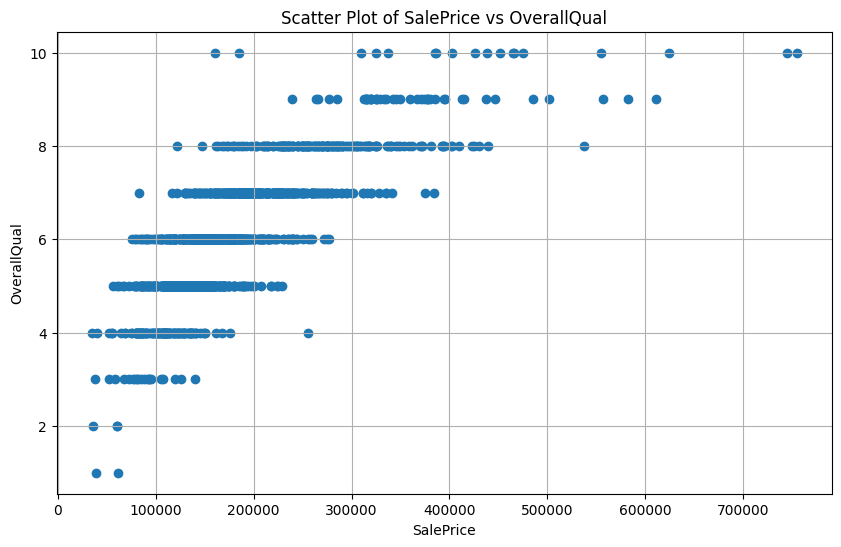

In [71]:
# Visualization: Scatter plot for Pearson's Correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['SalePrice'], df['OverallQual'])
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.title('Scatter Plot of SalePrice vs OverallQual')
plt.grid(True)
plt.show()


In [72]:
from scipy.stats import binom


In [73]:
#Binomial Distribution
#Define the parameters:
n = 100  # Number of trials
p = 0.4  # Probability of success in each trial
k = 2
Probability=binom.pmf(k,n,p)
print(Probability)


1.4373009717001502e-19


In [74]:
# Probability of getting exactly 6 successes (heads)
k = 6
probability = binom.pmf(k, n, p)
print("Probability of getting exactly 6 successes (heads):", probability)

Probability of getting exactly 6 successes (heads): 6.837114145255028e-15


In [75]:
#Uniform Distribution
from scipy.stats import uniform


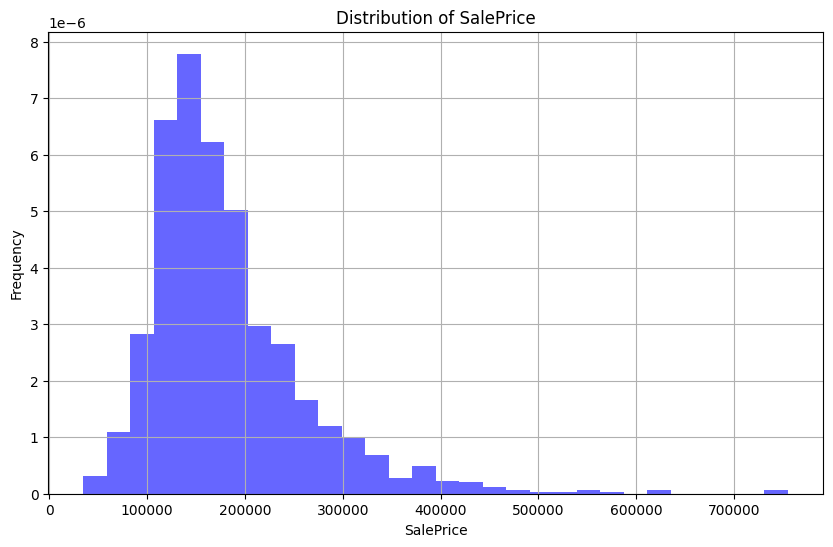

In [76]:
# Plot a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, density=True, alpha=0.6, color='b')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.grid(True)
plt.show()

In [77]:
#Normal Distribution
from scipy.stats import norm
normal_dis=norm.rvs(size=1000,loc=0,scale=1)
normal_dis




array([-2.08471226e+00, -3.17864901e-01,  1.51552232e+00, -8.31458807e-01,
       -1.81826034e+00,  2.16610363e+00, -1.06118486e+00, -2.07504039e-02,
       -7.76383842e-01, -7.58004771e-01,  1.15395401e+00, -7.22168620e-01,
       -6.18364324e-01,  1.20345998e+00, -8.98256228e-01, -2.36730497e-01,
        1.99327155e+00, -1.43772874e+00,  1.30719291e+00, -1.50717343e+00,
        1.71249313e+00, -5.02183557e-01, -1.45284610e+00, -1.02309036e+00,
       -2.61623673e+00, -1.40018221e+00,  1.34113255e+00,  7.03062629e-01,
        1.16201116e-01, -3.40423332e-01,  1.98413333e-01,  5.76480014e-01,
       -7.79346960e-01, -7.41756850e-01,  7.33294341e-02,  1.39963271e+00,
       -4.17145855e-01, -1.43781477e+00, -3.57058815e-01,  7.22045646e-01,
       -2.28599300e-01,  1.04346314e+00, -5.42999158e-02, -5.29814043e-01,
       -1.28110972e+00, -3.58138014e-01, -7.97745639e-01,  1.23326961e+00,
       -4.54570807e-02,  6.43604964e-01,  2.06776362e+00, -2.49330760e-01,
       -3.97043235e-01,  

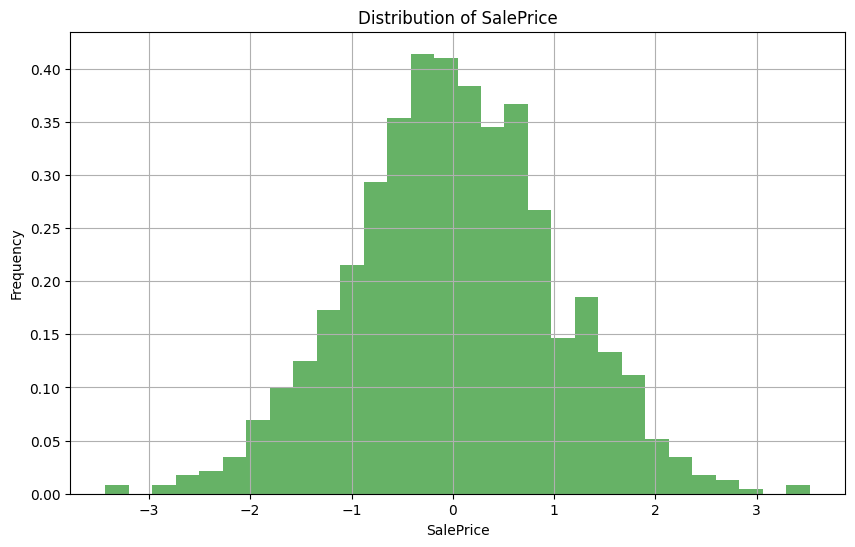

In [78]:
# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(normal_dis, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.grid(True)
plt.show()

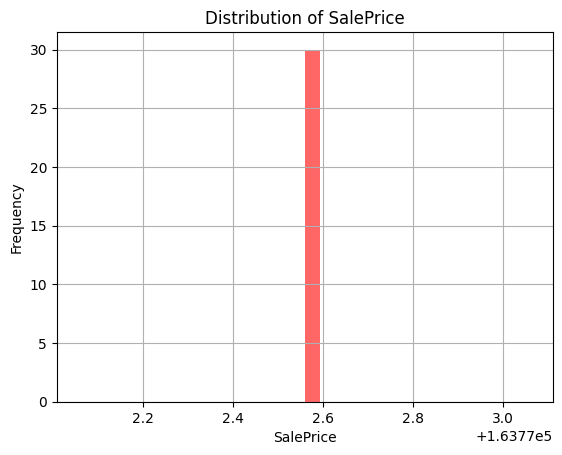

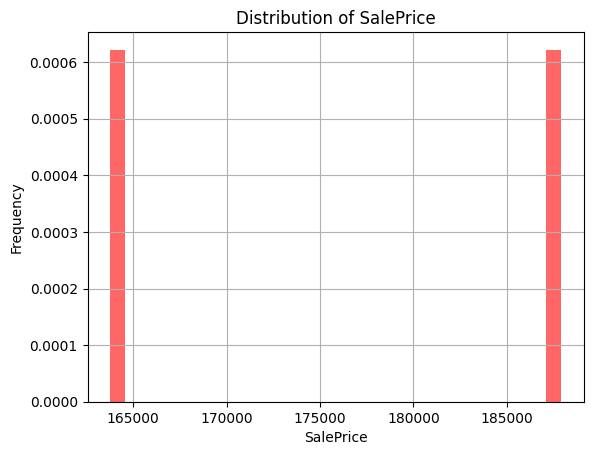

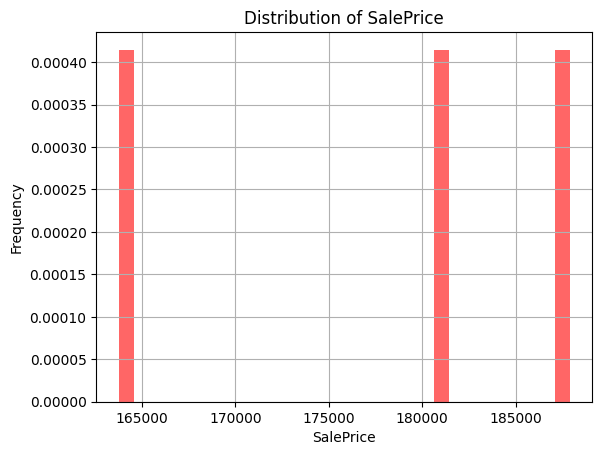

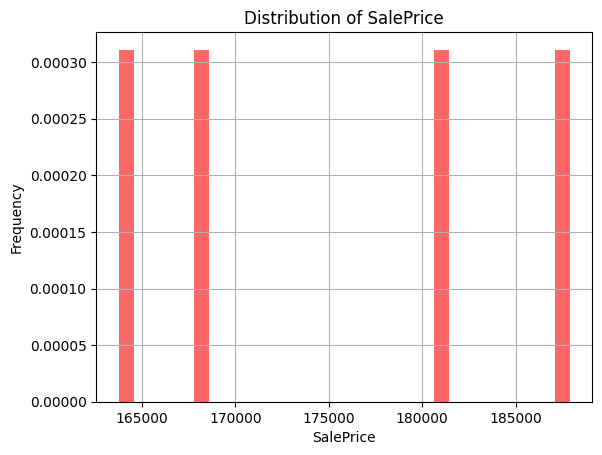

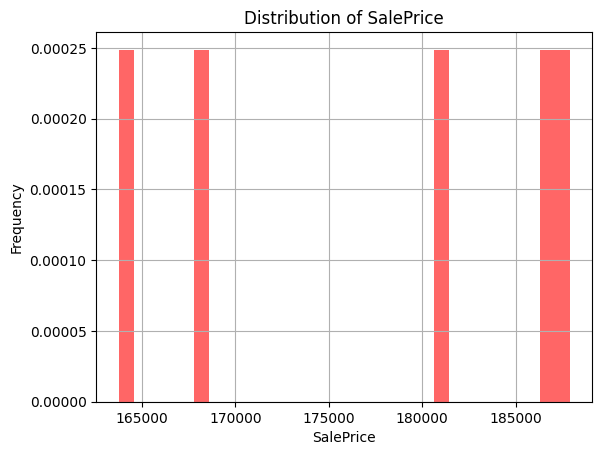

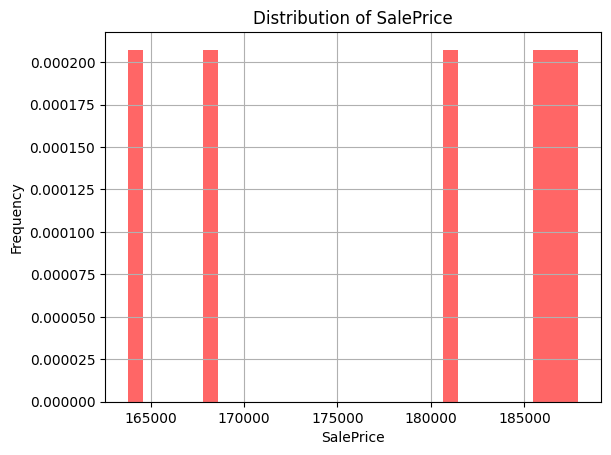

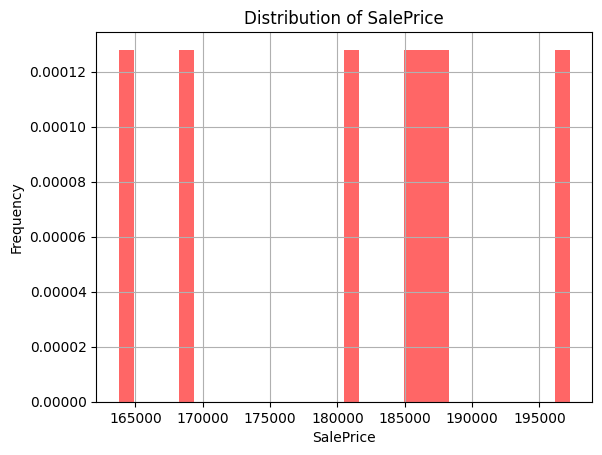

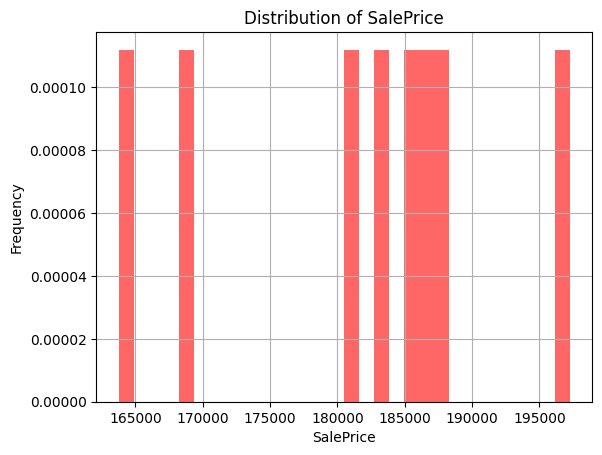

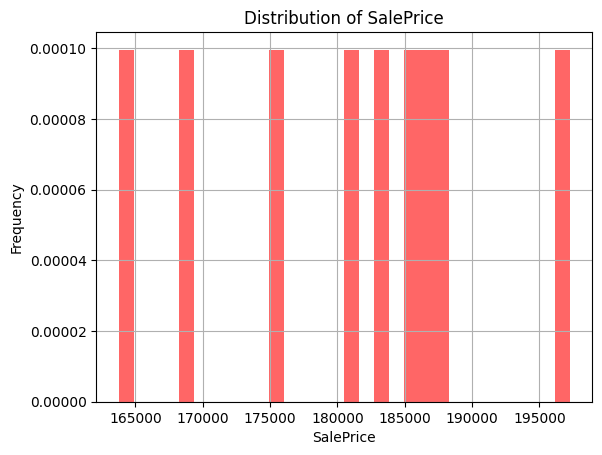

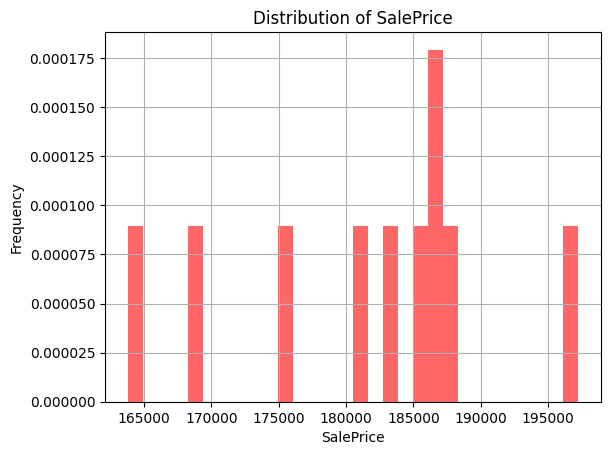

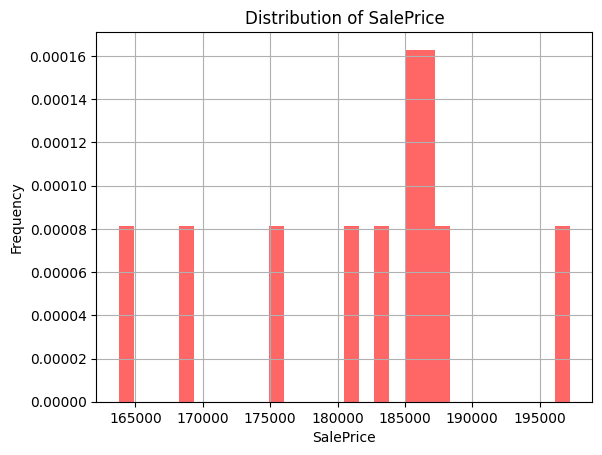

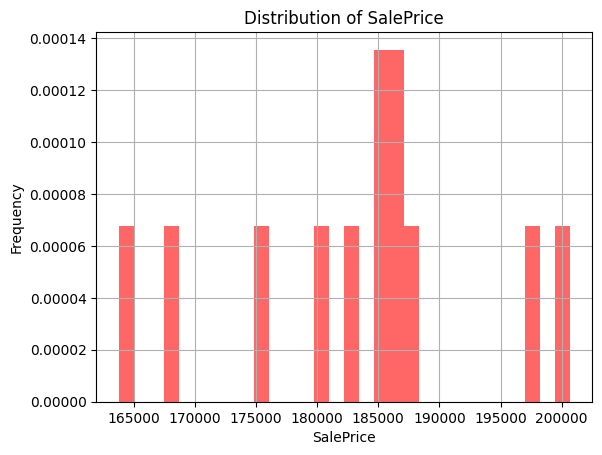

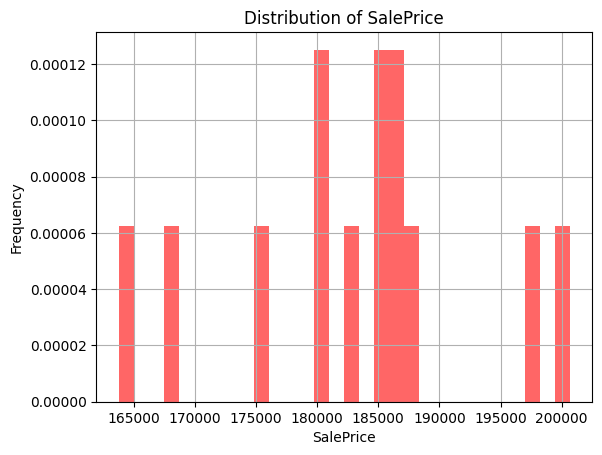

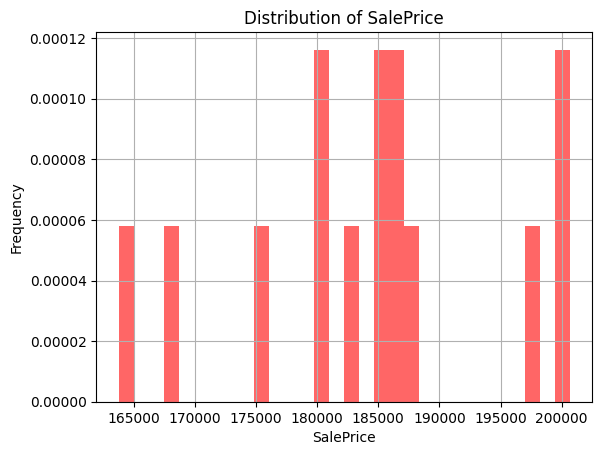

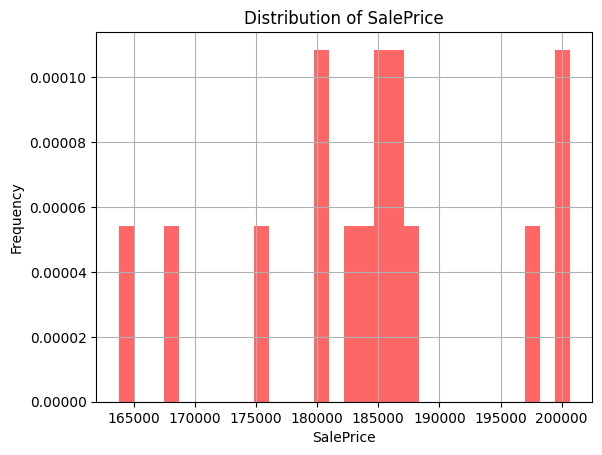

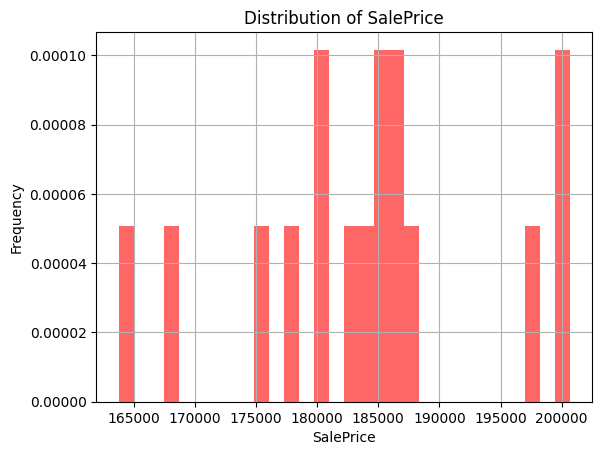

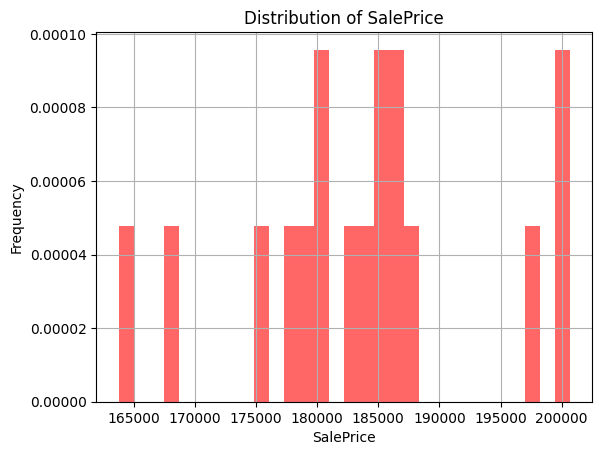

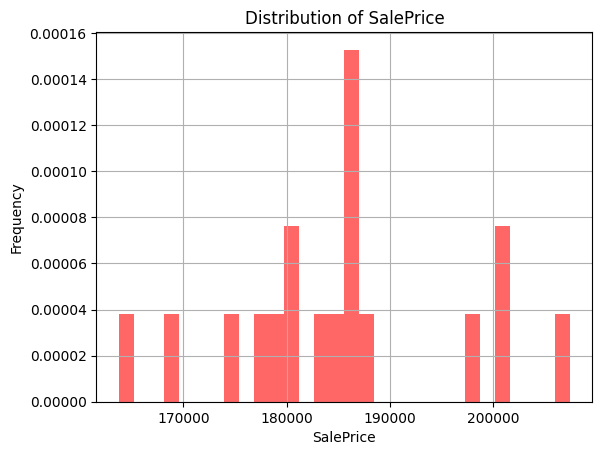

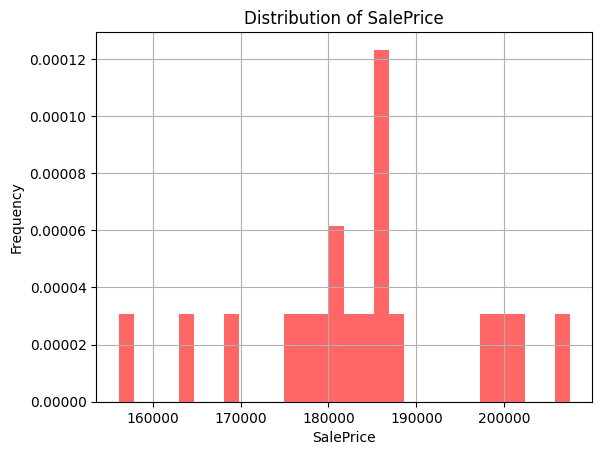

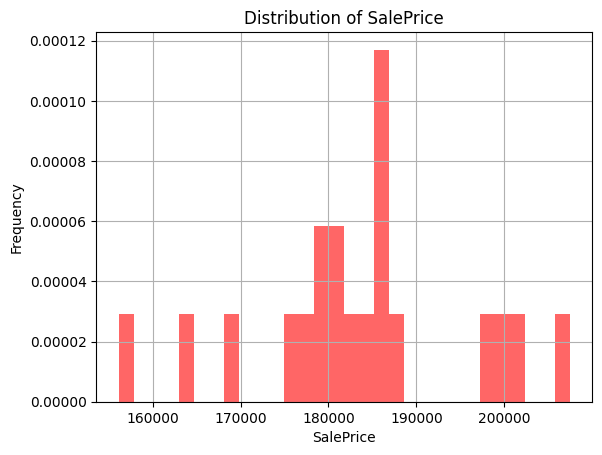

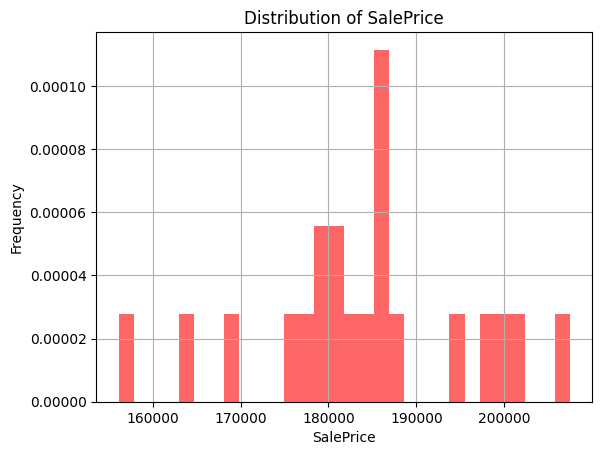

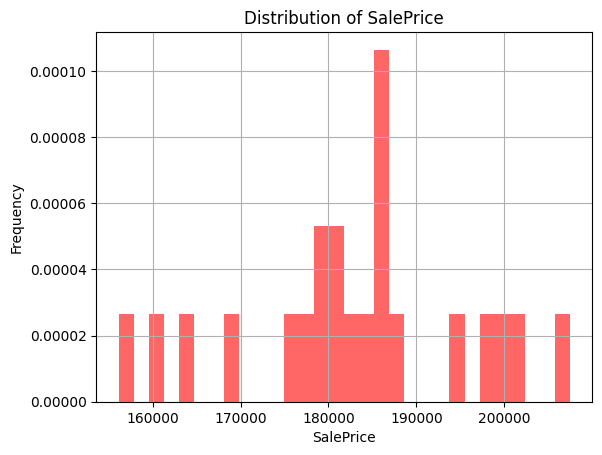

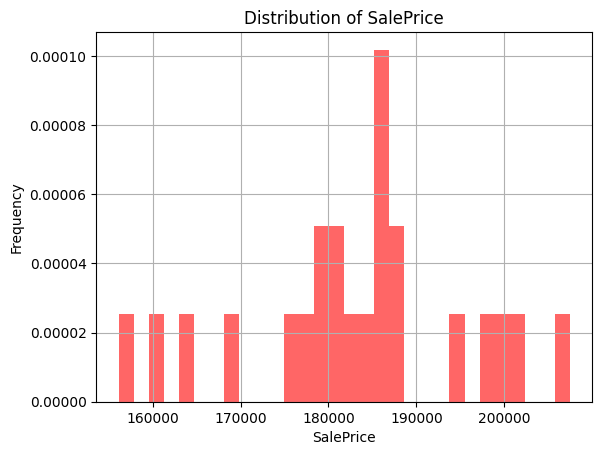

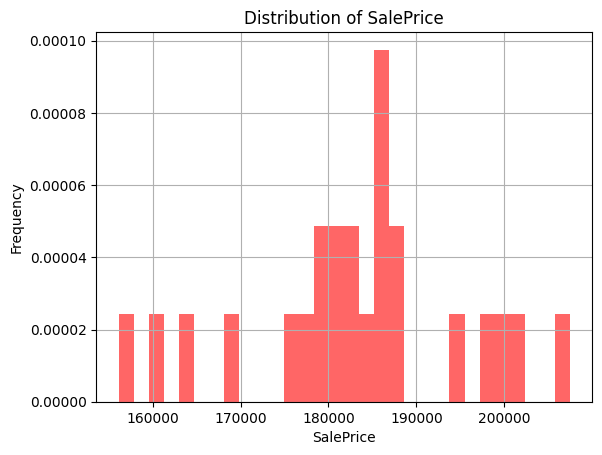

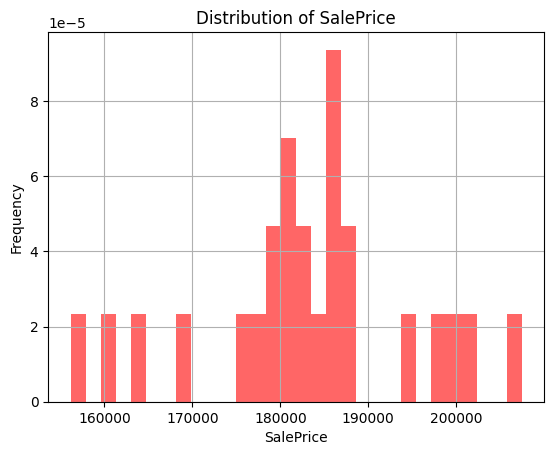

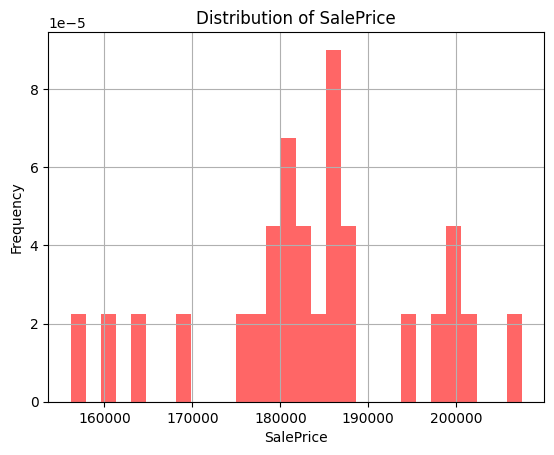

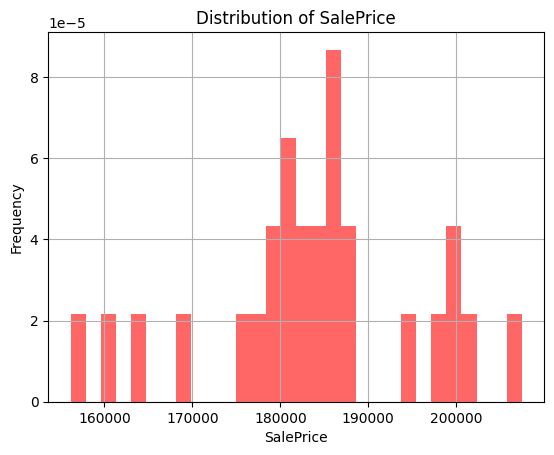

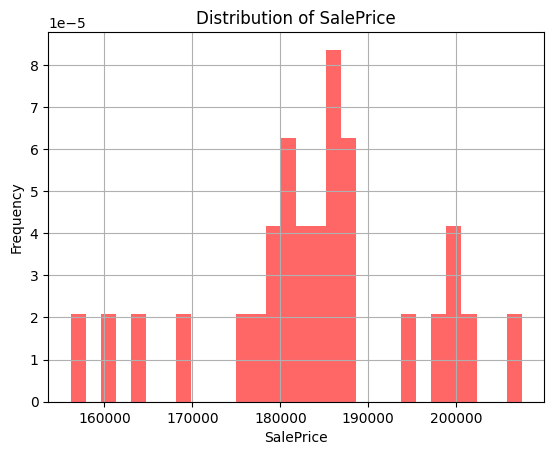

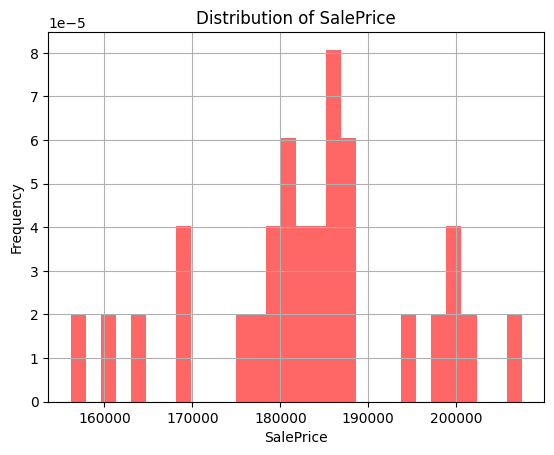

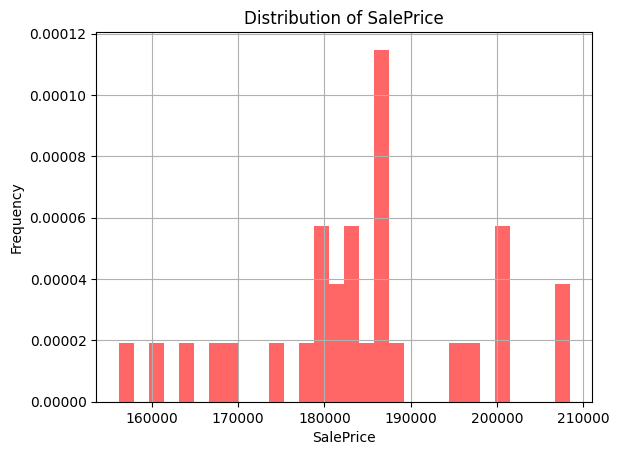

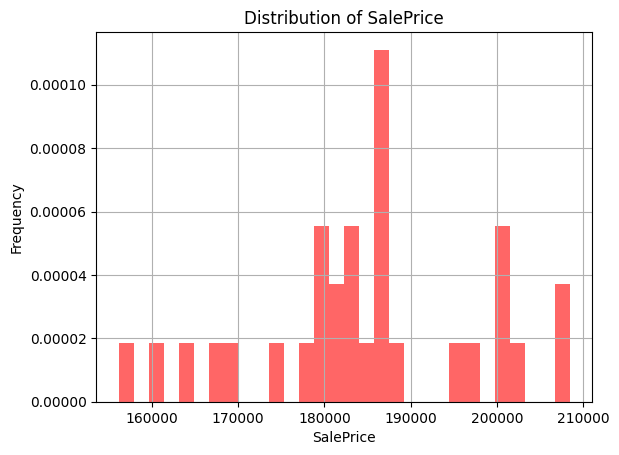

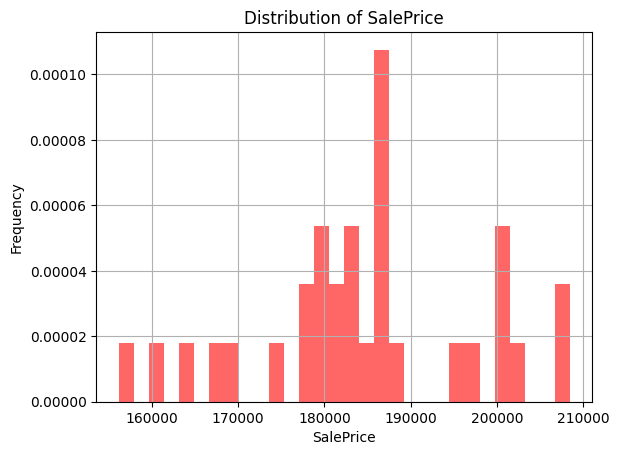

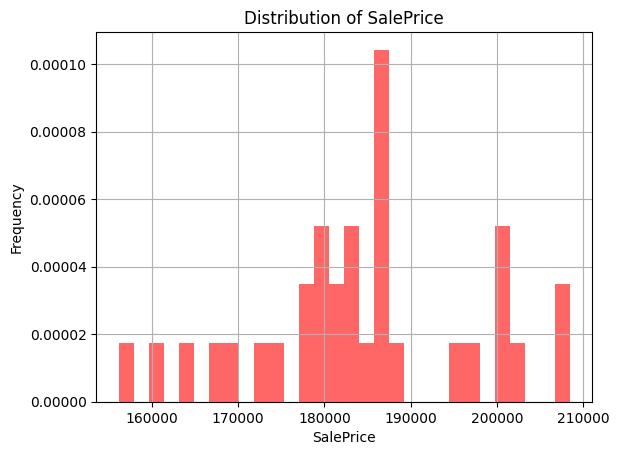

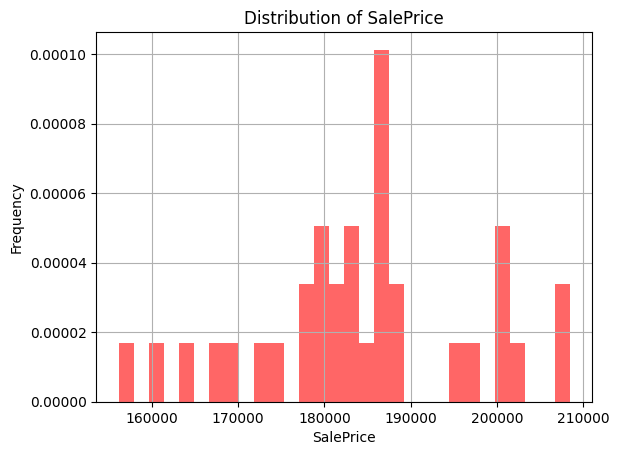

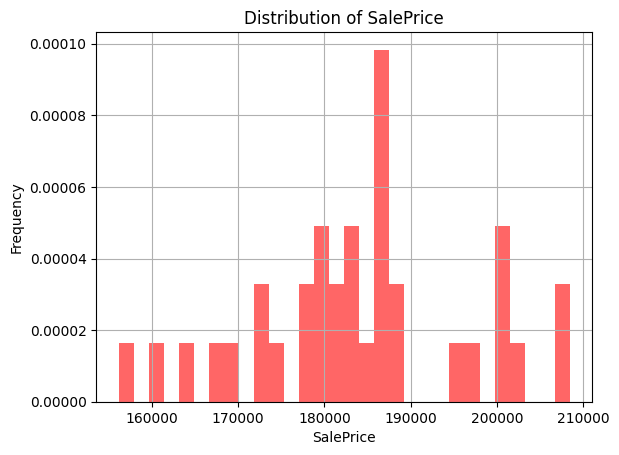

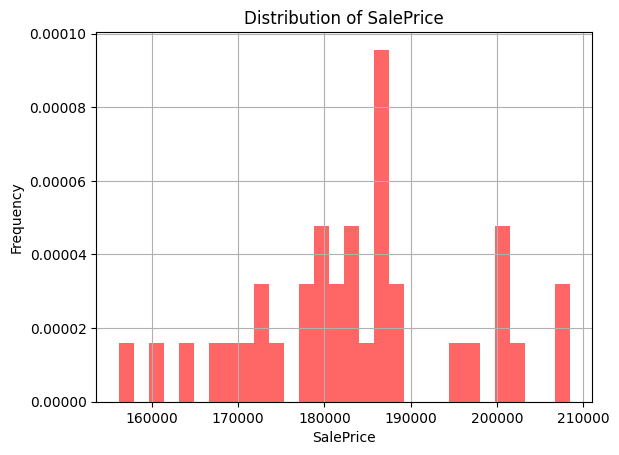

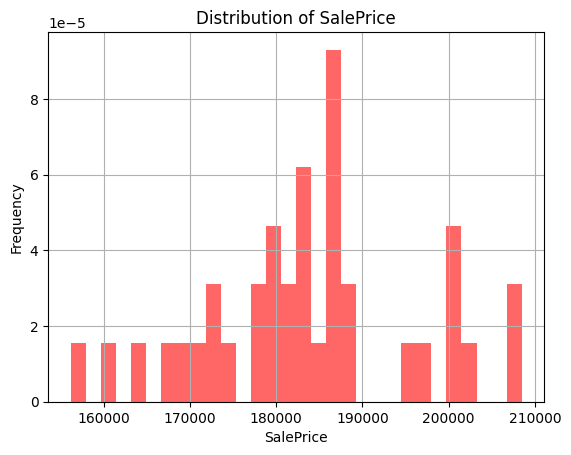

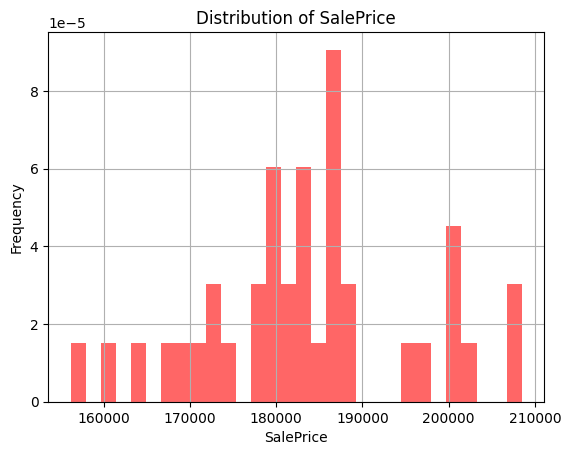

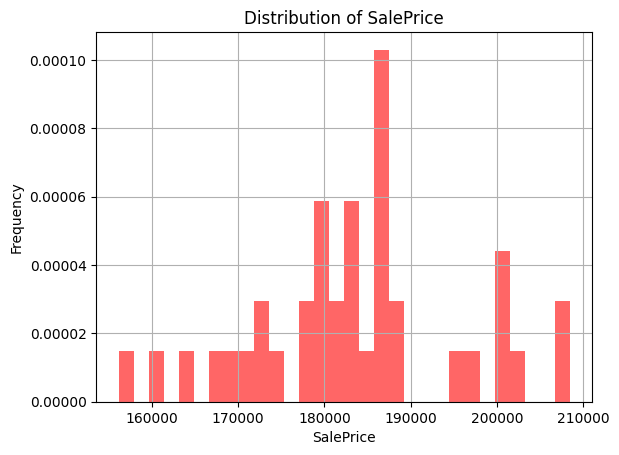

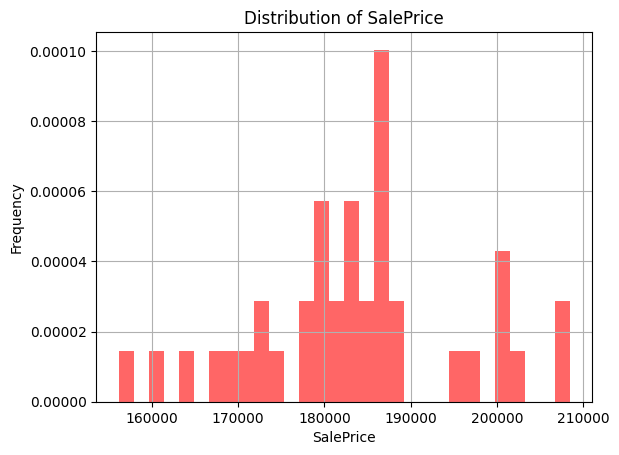

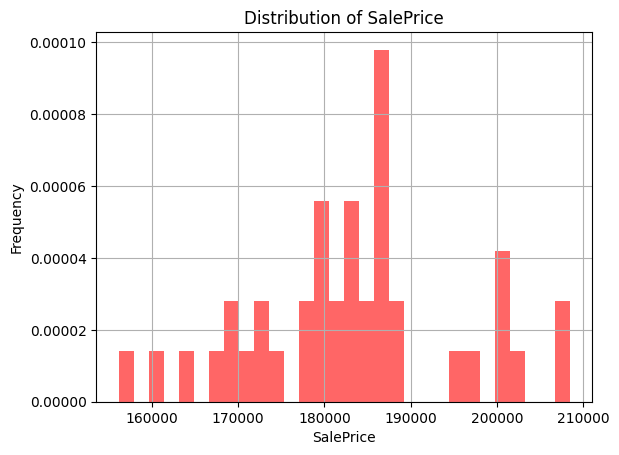

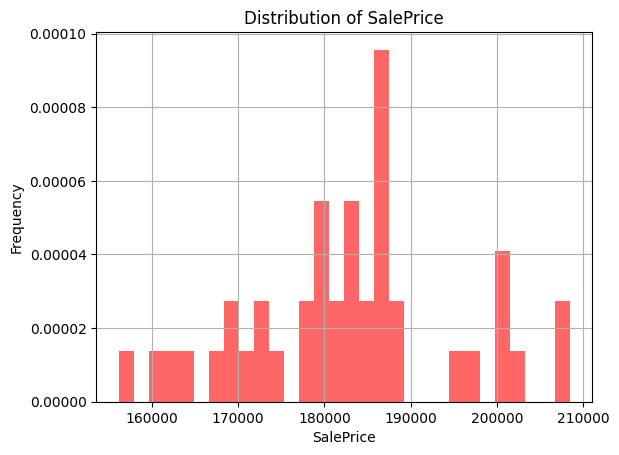

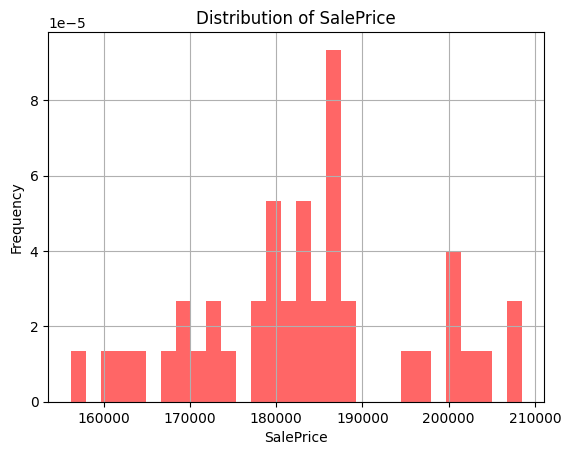

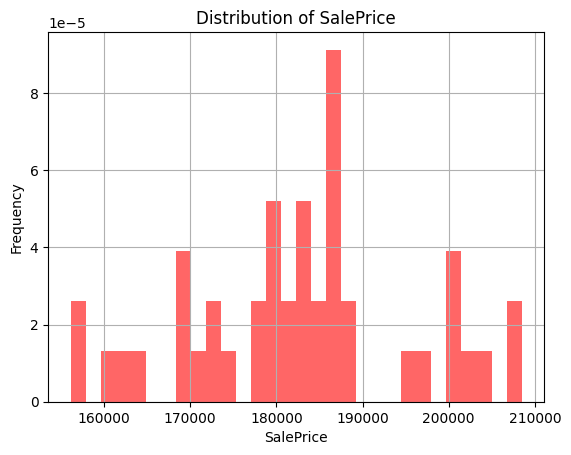

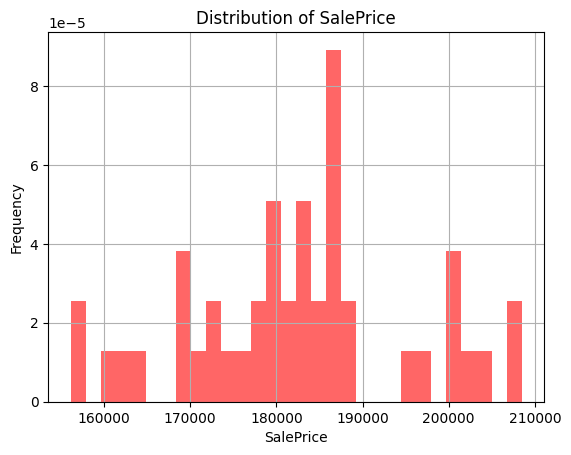

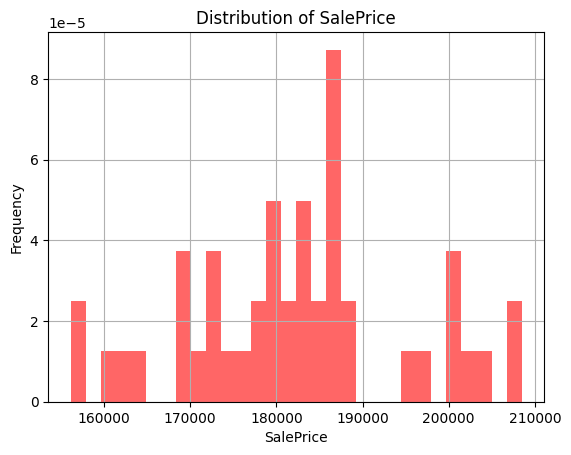

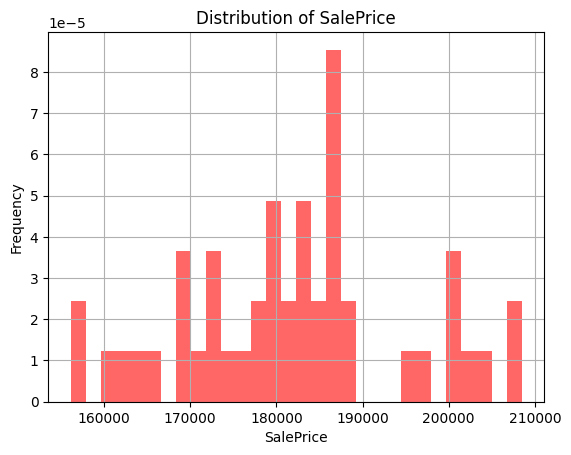

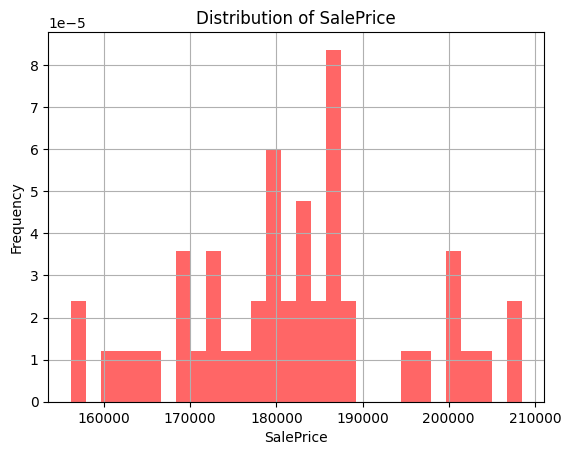

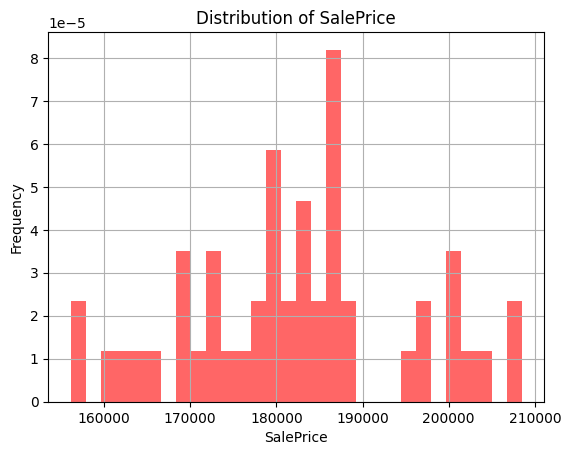

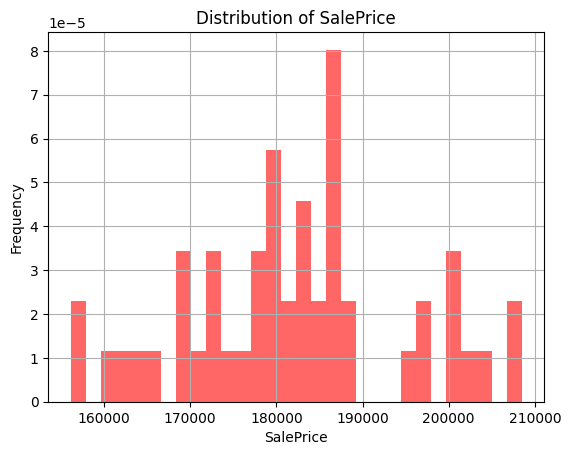

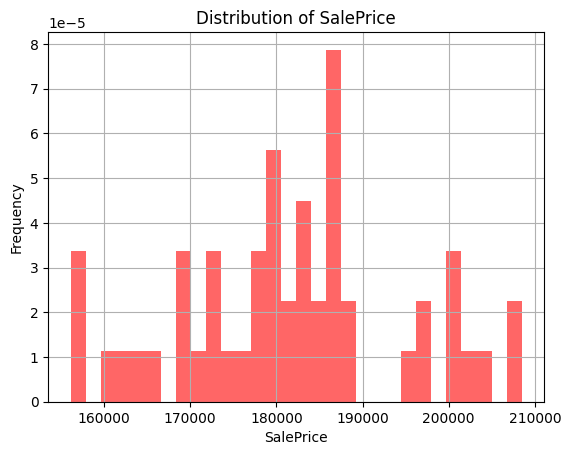

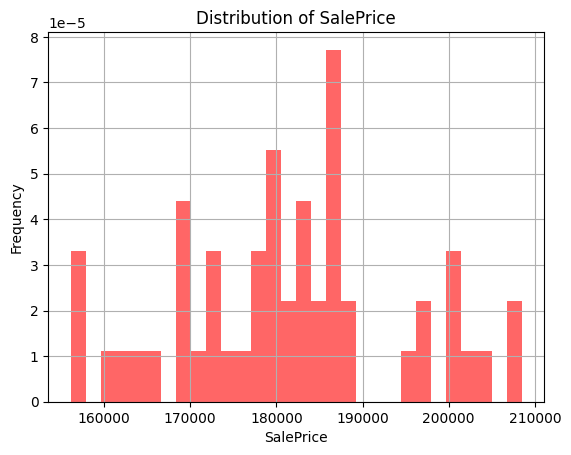

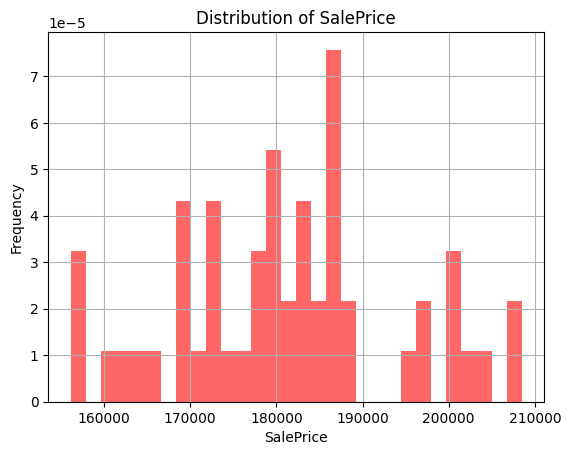

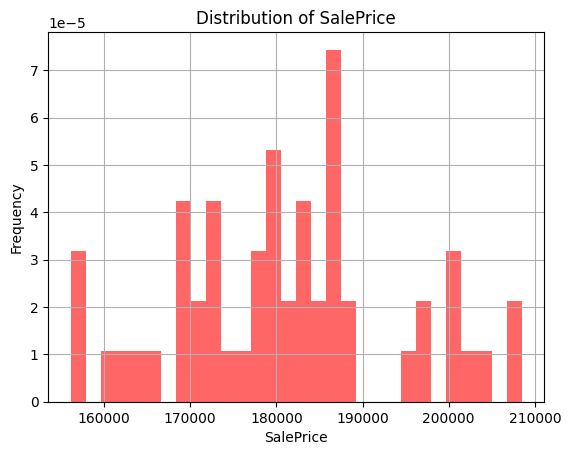

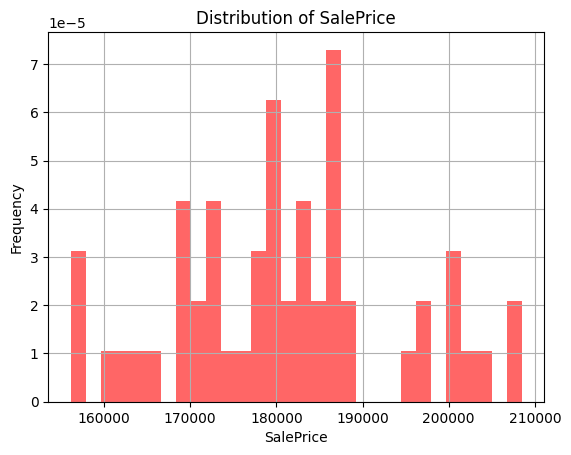

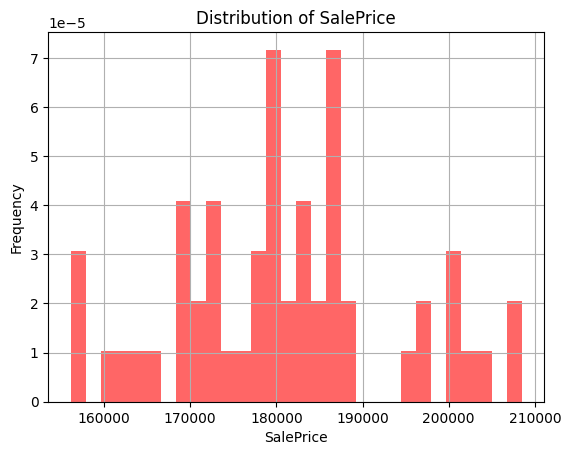

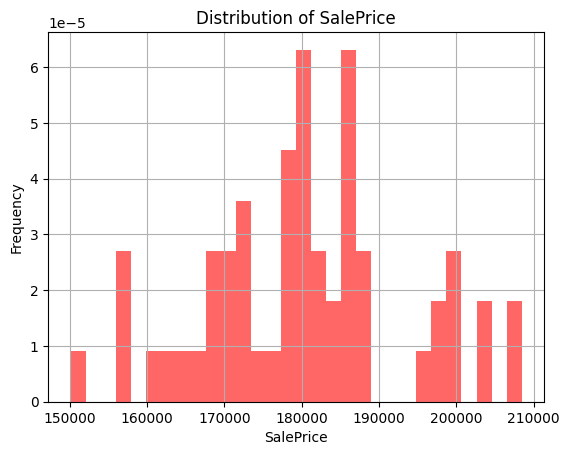

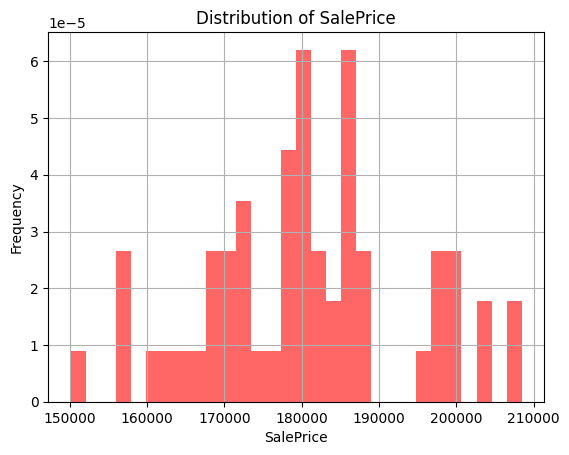

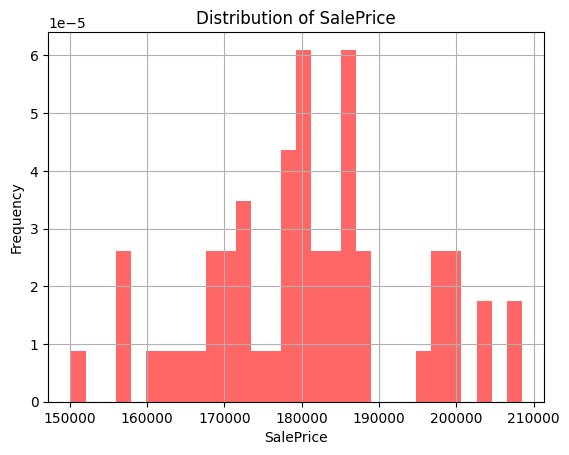

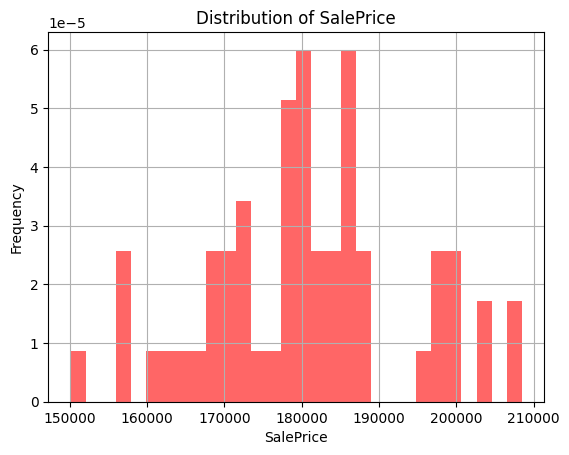

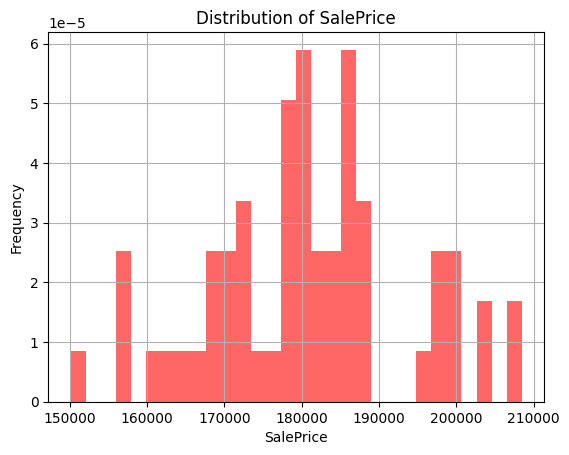

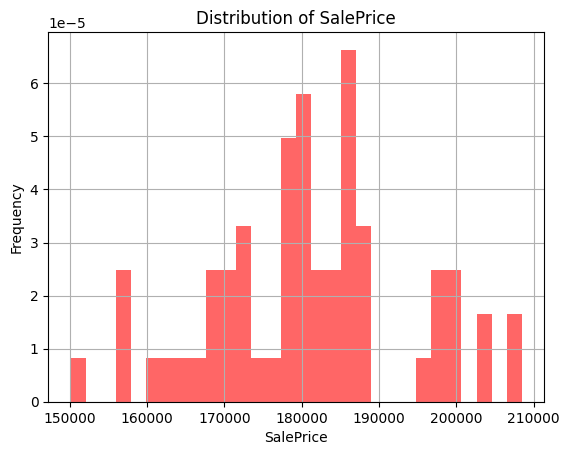

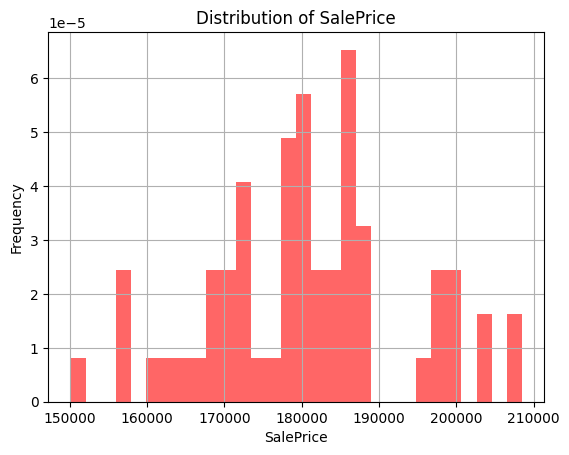

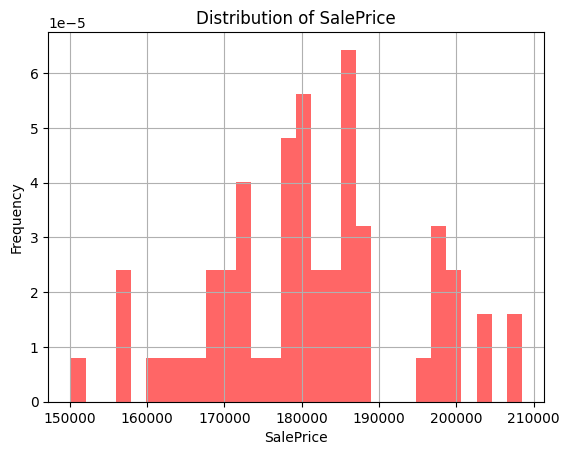

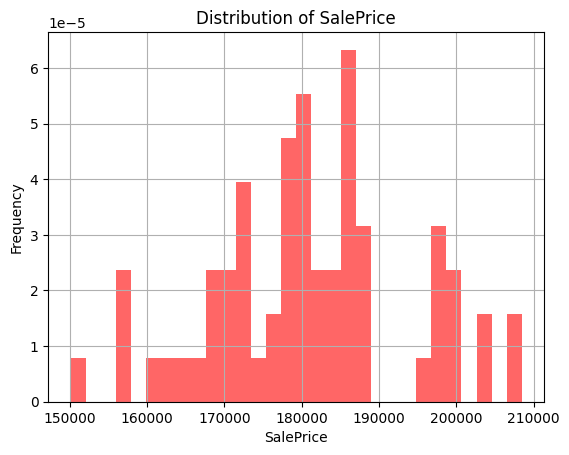

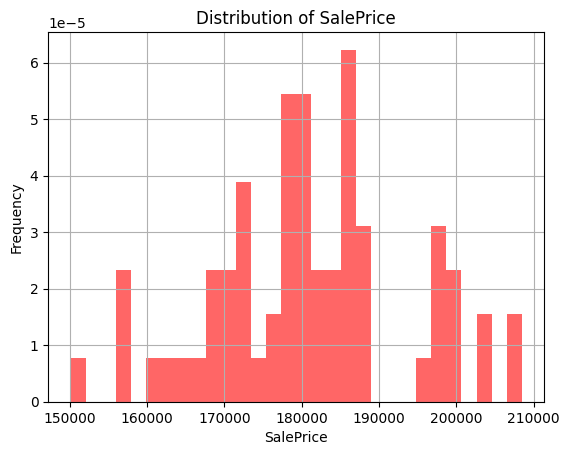

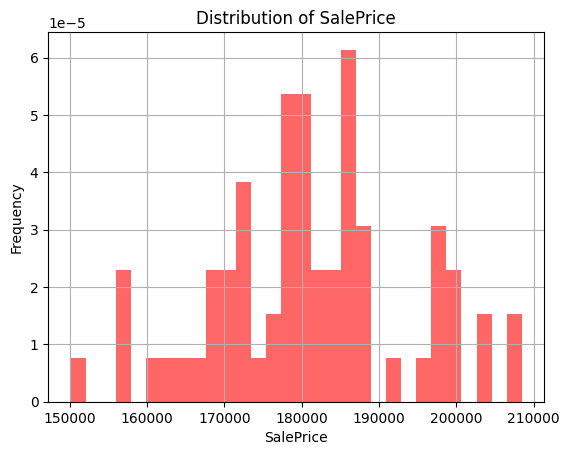

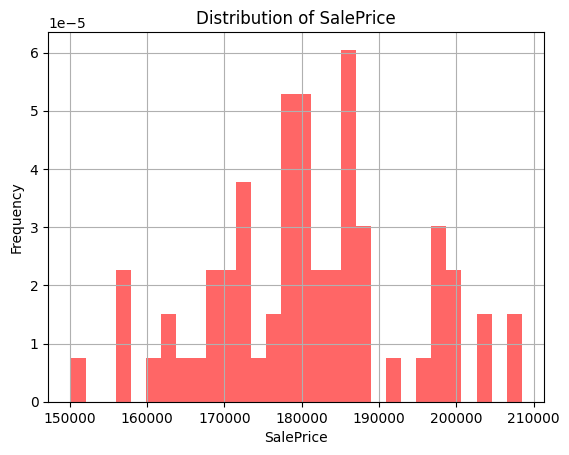

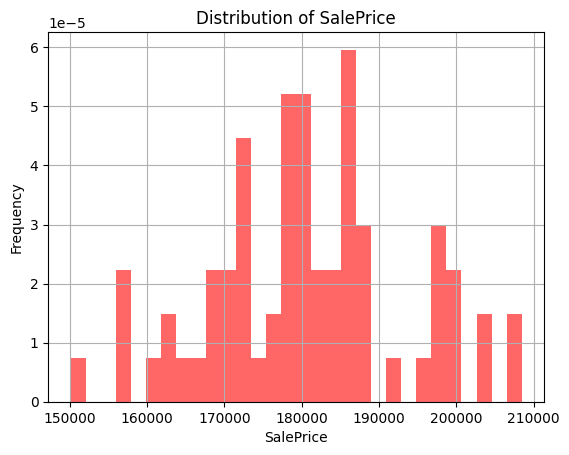

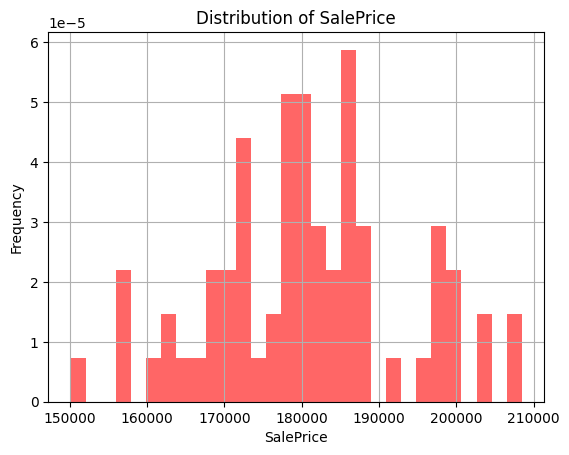

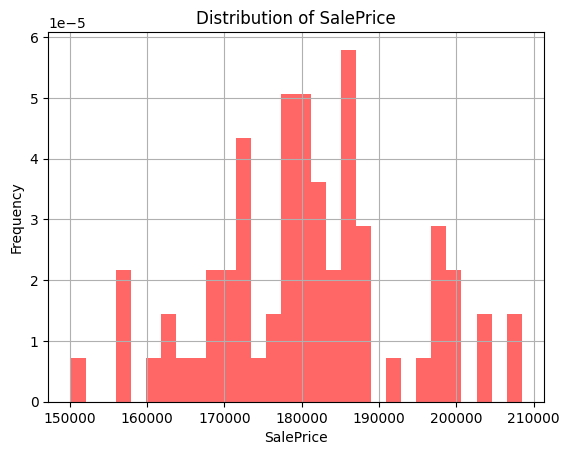

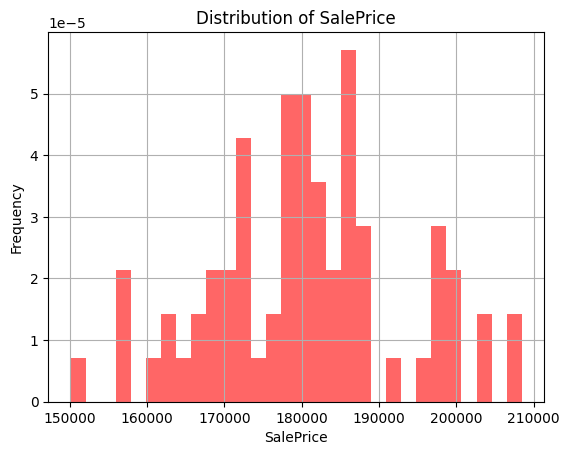

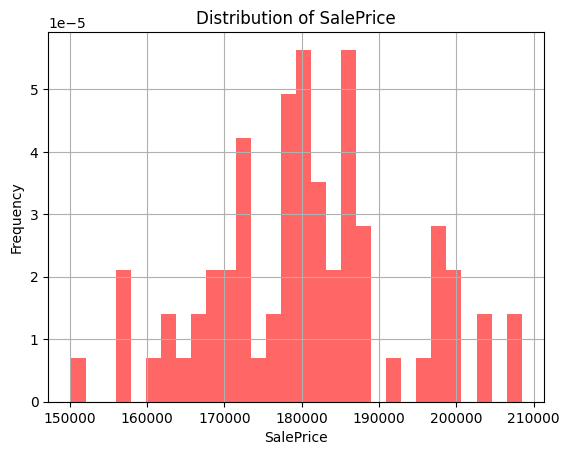

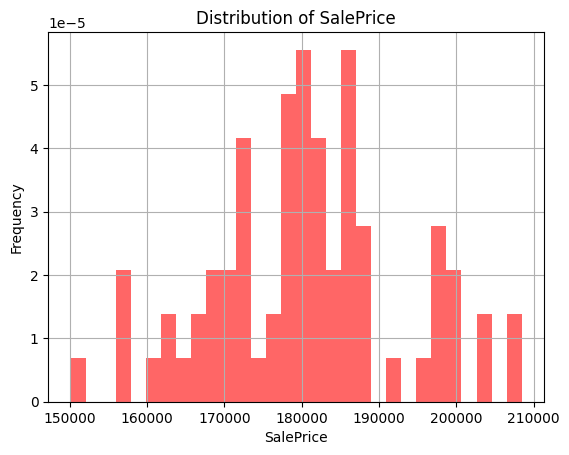

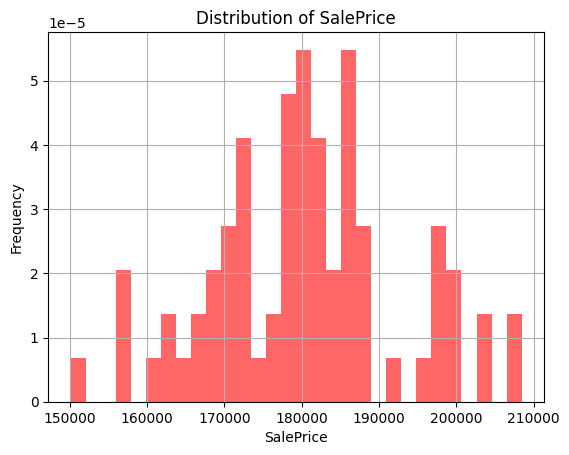

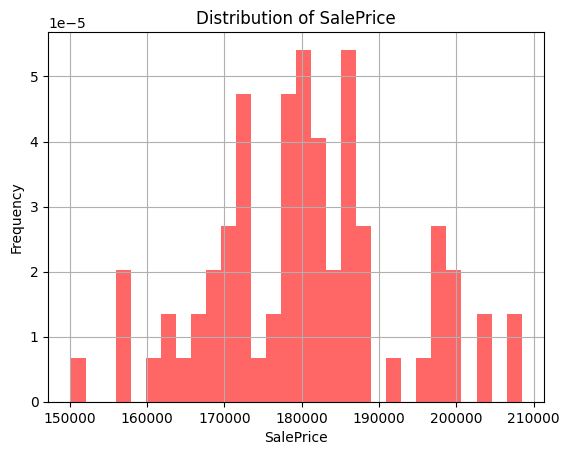

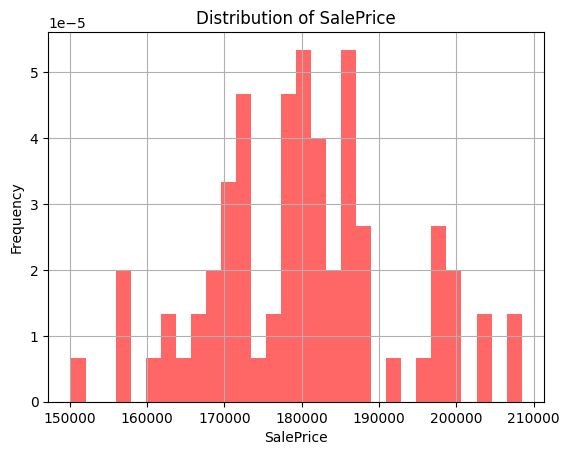

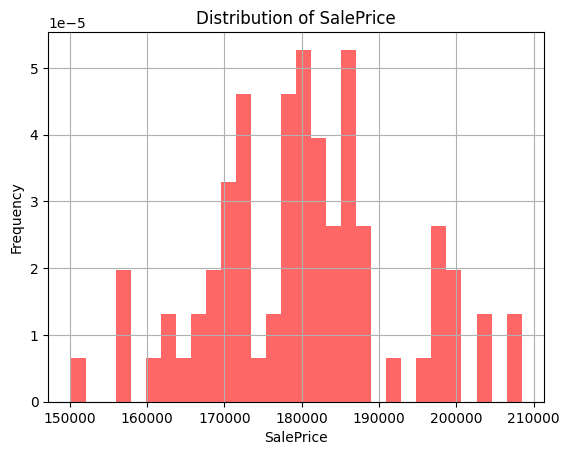

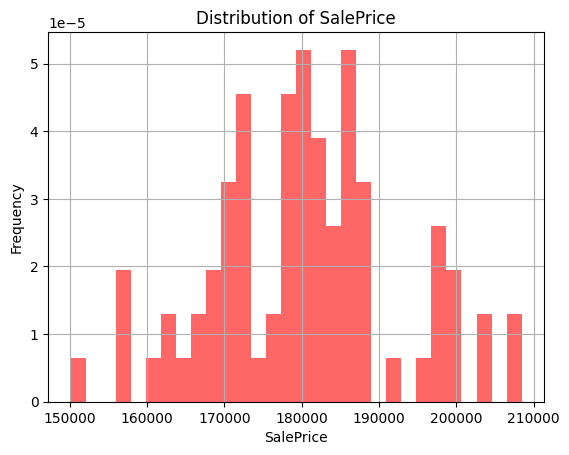

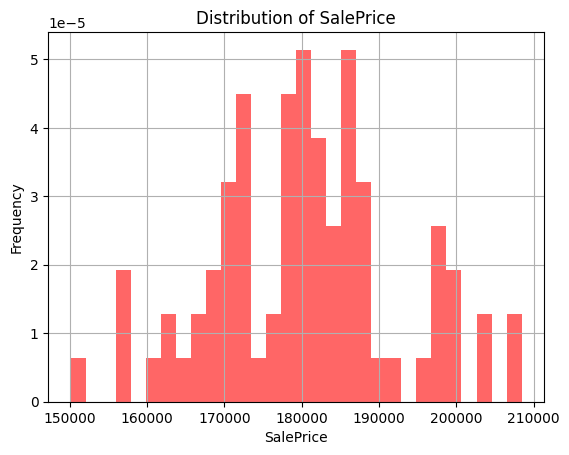

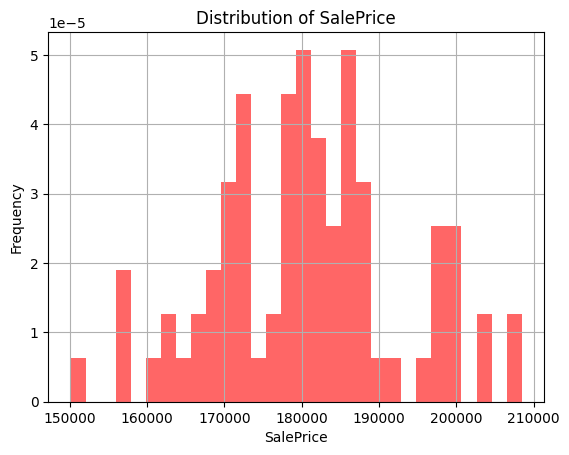

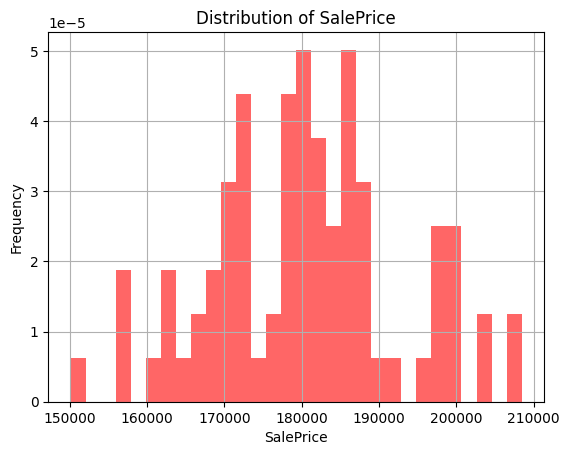

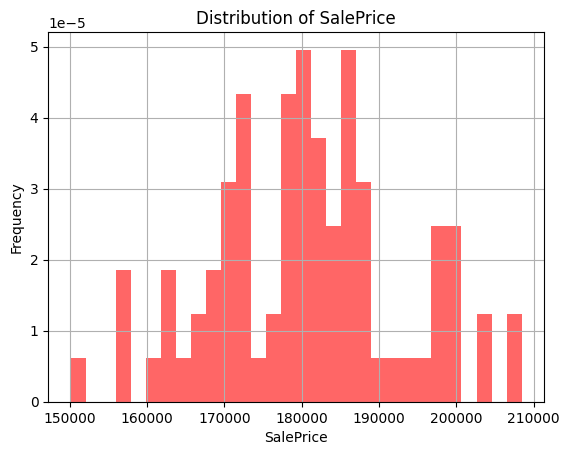

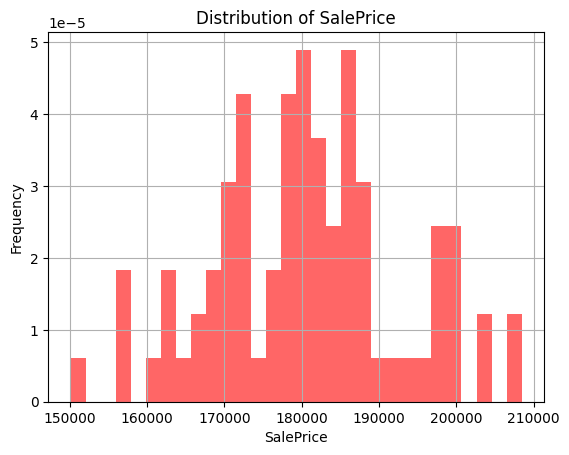

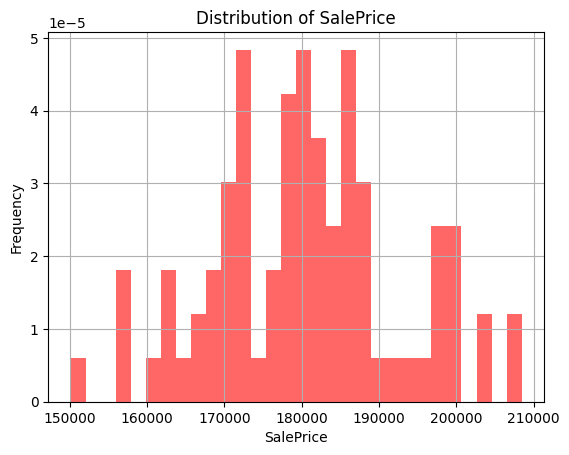

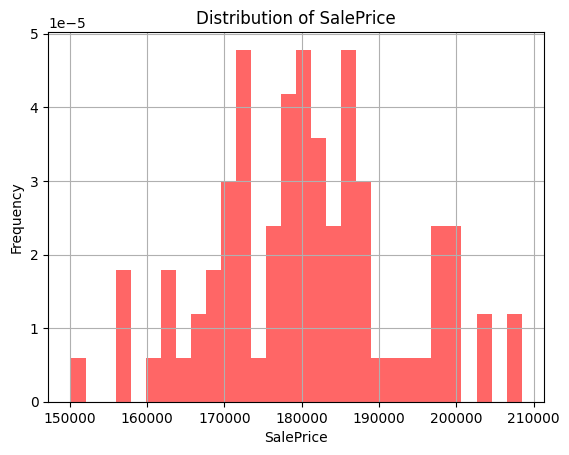

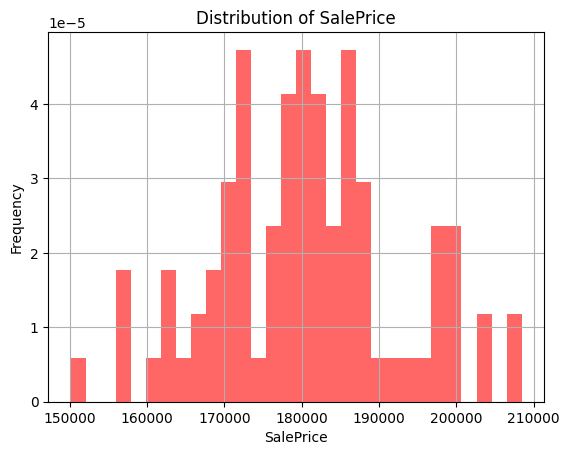

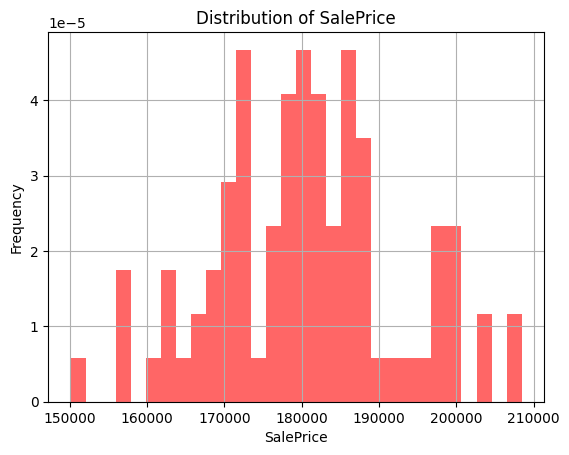

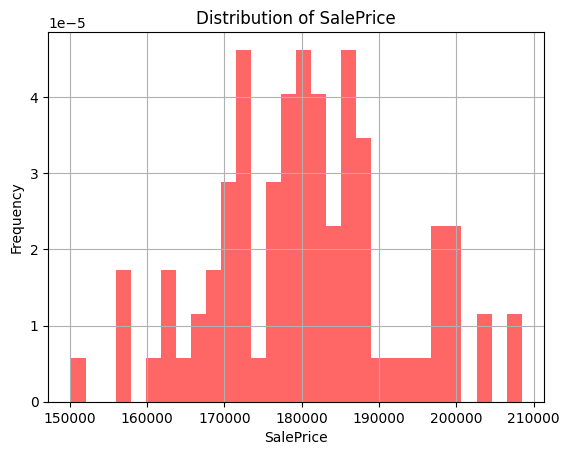

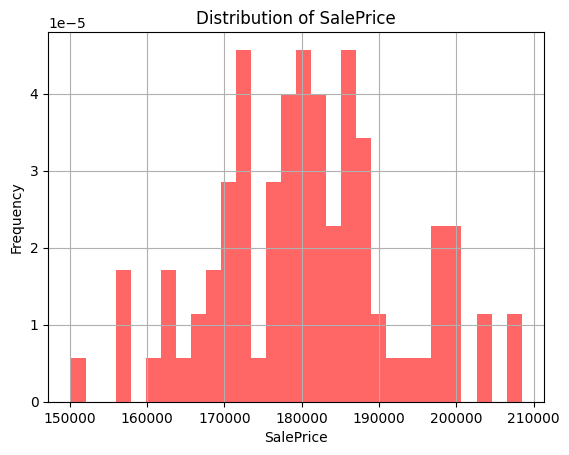

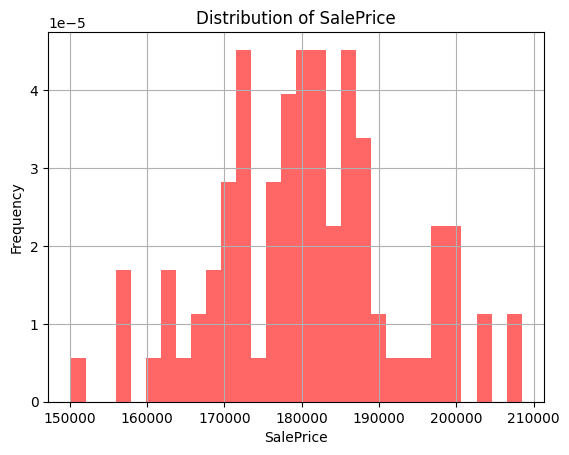

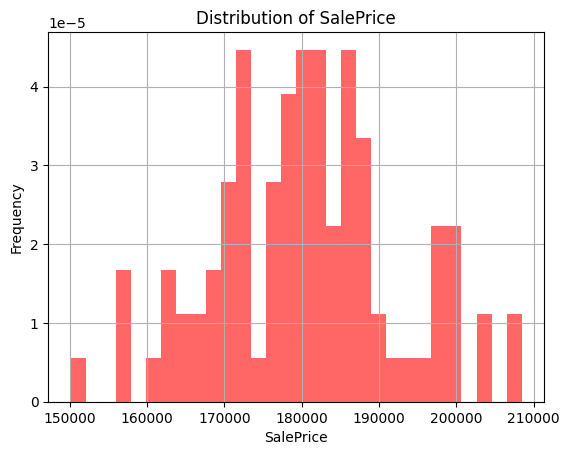

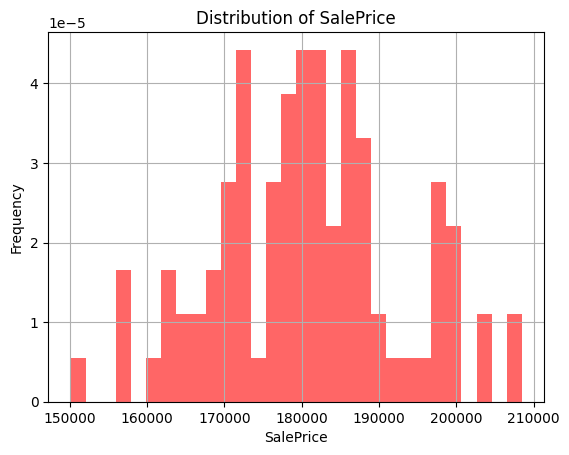

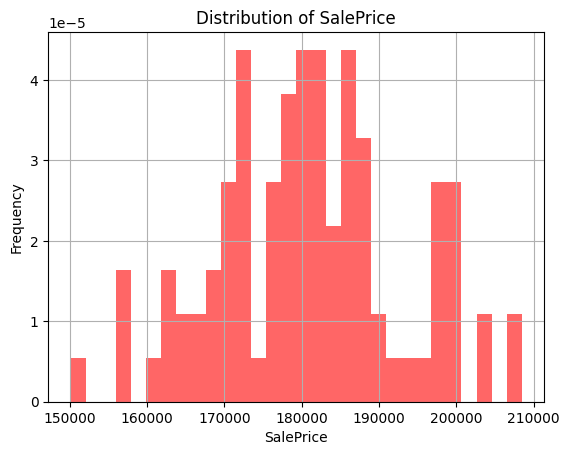

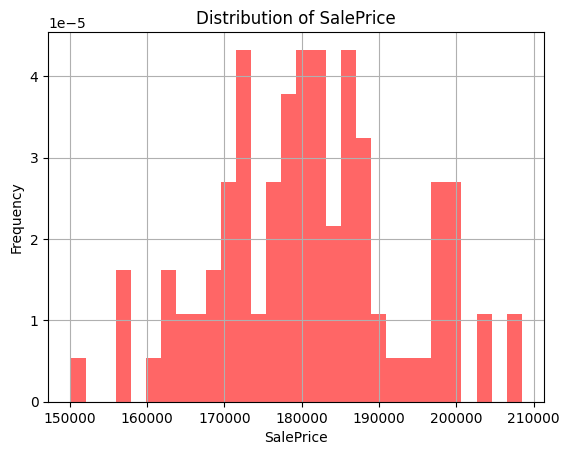

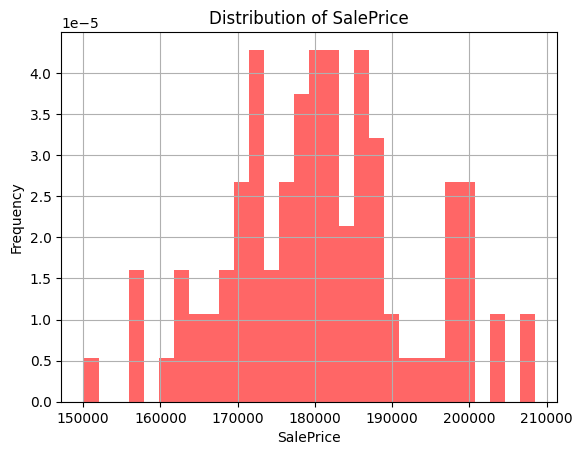

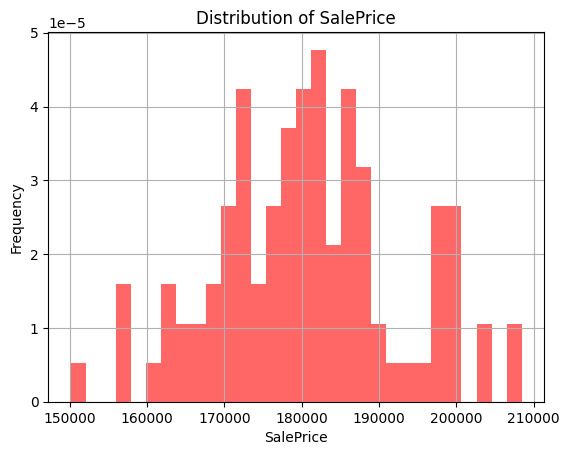

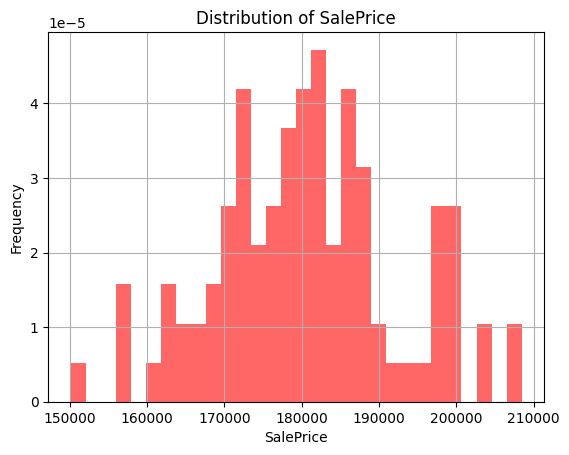

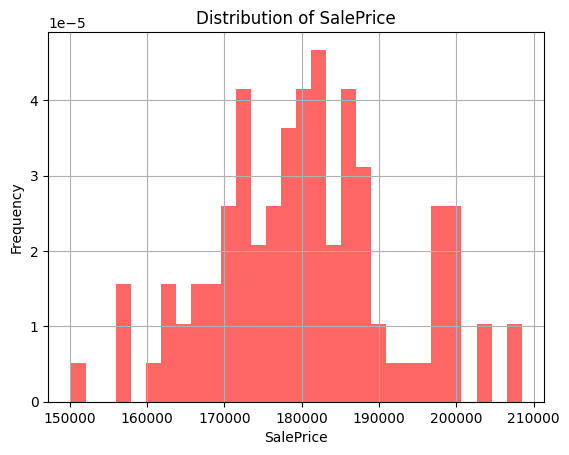

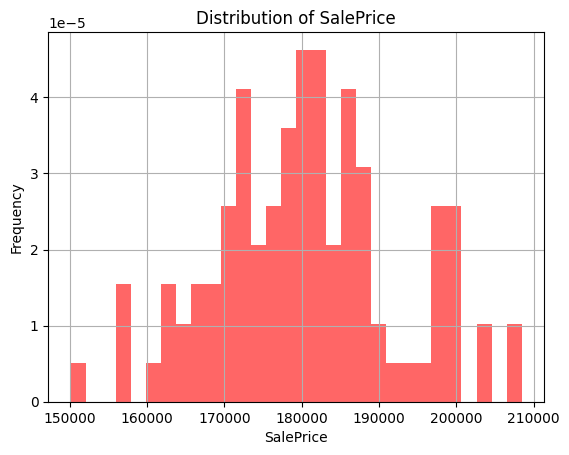

In [79]:
#Central Limit Theorem
sample_means=[]
for _ in range(100):
  sample=df['SalePrice'].sample(n=50,replace=True)
  sample_mean=sample.mean()
  sample_means.append(sample_mean)
  plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='r')
  plt.xlabel('SalePrice')
  plt.ylabel('Frequency')
  plt.title('Distribution of SalePrice')
  plt.grid(True)
  plt.show()

In [80]:
# Cumulative probability
from scipy.stats import norm
Cumulative=norm.cdf(x=0,loc=0,scale=1)
Cumulative


0.5

In [81]:
# Expected number of successes (mean)
expected_mean = n * p
print("Expected number of successes (mean):", expected_mean)

Expected number of successes (mean): 40.0


In [82]:
# Expected number of successes (std)
expected_std = np.sqrt(n * p * (1 - p))
print("Expected number of successes (std):", expected_std)


Expected number of successes (std): 4.898979485566356


In [83]:
import scipy.stats as stats
import numpy as np

# Calculate the sample mean and standard deviation
sample_mean = df['SalePrice'].mean()
sample_std = df['SalePrice'].std()

# Define the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=len(df['SalePrice']) - 1) * sample_std / np.sqrt(len(df['SalePrice']))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Confidence Interval:", confidence_interval)

Confidence Interval: (176842.84104108496, 184999.55073973694)


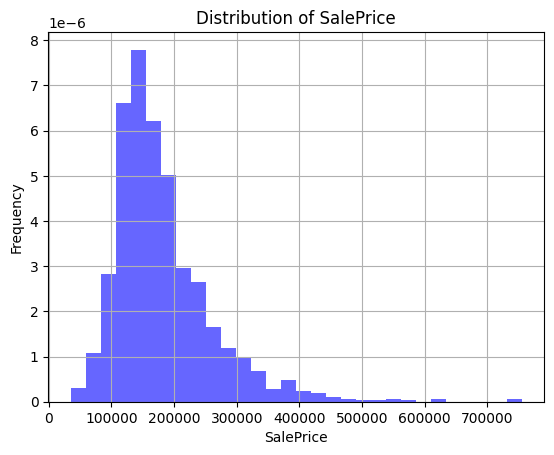

In [84]:
#plot
plt.figure
plt.hist(df['SalePrice'], bins=30, density=True, alpha=0.6, color='b')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.grid(True)
plt.show()

In [85]:
z_score=np.abs(stats.zscore(df['SalePrice']))
z_score

0       0.347273
1       0.007288
2       0.536154
3       0.515281
4       0.869843
          ...   
1455    0.074560
1456    0.366161
1457    1.077611
1458    0.488523
1459    0.420841
Name: SalePrice, Length: 1460, dtype: float64

In [86]:
# Standard Error for Proportion
standard_error = np.sqrt((p * (1 - p)) / n)
standard_error

0.04898979485566356

In [87]:
# Margin of Error
margin_of_error = z_score * standard_error
margin_of_error

0       0.017013
1       0.000357
2       0.026266
3       0.025244
4       0.042613
          ...   
1455    0.003653
1456    0.017938
1457    0.052792
1458    0.023933
1459    0.020617
Name: SalePrice, Length: 1460, dtype: float64

In [88]:
# Confidence Interval
confidence_interval = (p - margin_of_error, p + margin_of_error)
confidence_interval

(0       0.382987
 1       0.399643
 2       0.373734
 3       0.374756
 4       0.357387
           ...   
 1455    0.396347
 1456    0.382062
 1457    0.347208
 1458    0.376067
 1459    0.379383
 Name: SalePrice, Length: 1460, dtype: float64,
 0       0.417013
 1       0.400357
 2       0.426266
 3       0.425244
 4       0.442613
           ...   
 1455    0.403653
 1456    0.417938
 1457    0.452792
 1458    0.423933
 1459    0.420617
 Name: SalePrice, Length: 1460, dtype: float64)

In [89]:
print("Confidence Interval:", confidence_interval)

Confidence Interval: (0       0.382987
1       0.399643
2       0.373734
3       0.374756
4       0.357387
          ...   
1455    0.396347
1456    0.382062
1457    0.347208
1458    0.376067
1459    0.379383
Name: SalePrice, Length: 1460, dtype: float64, 0       0.417013
1       0.400357
2       0.426266
3       0.425244
4       0.442613
          ...   
1455    0.403653
1456    0.417938
1457    0.452792
1458    0.423933
1459    0.420617
Name: SalePrice, Length: 1460, dtype: float64)


In [90]:
t_statistic, p_value = stats.ttest_ind(df['SalePrice'], df['OverallQual'])
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 87.01584016086056
P-value: 0.0


In [91]:
# Set significance level (alpha)
alpha = 0.05

# Compare p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in SalePrice and OverallQual.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in SalePrice and OverallQual.")


Reject the null hypothesis: There is a significant difference in SalePrice and OverallQual.


In [92]:
#encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['OverallQual']=encoder.fit_transform(df['OverallQual'])
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ...  Fence MiscFeature MiscVal MoSold YrSold  \
0            Lvl    AllPub  ...    NaN         NaN       0      2   2008   
1            Lvl    AllPub  ...    NaN         NaN       0      5   2007   
2            Lvl    AllPub  ...    NaN         NaN       0      9   2008   
3            Lvl    AllPub  ...    NaN         NaN       0      2   2006   
4            Lvl    AllPub  ...    NaN         NaN       0     12   2008   
...          ...       ...  ...    ...         ...     ...    ...    ...   
1455         Lvl    AllPub  ...    NaN         NaN       0      8   2007   
1456         Lvl    AllPub  ...  MnPrv         NaN       0      2   2010   
1457         Lvl    AllPub  ...  GdPrv        Shed    2500      5   2010   
1458         Lvl    AllPub  ...    NaN         NaN       0      4   2010   
1459         Lvl    AllPub  ...    NaN         NaN       0      6   2008   

     SaleType SaleCondition  SalePrice  TransformedSalePrice  zscore_SalePrice  
0          WD        Normal     208500                427000          0.347273  
1          WD        Normal     181500                373000          0.007288  
2          WD        Normal     223500                457000          0.536154  
3          WD       Abnorml     140000                290000         -0.515281  
4          WD        Normal     250000                510000          0.869843  
...       ...           ...        ...                   ...               ...  
1455       WD        Normal     175000                360000         -0.074560  
1456       WD        Normal     210000                430000          0.366161  
1457       WD        Normal     266500                543000          1.077611  
1458       WD        Normal     142125                294250         -0.488523  
1459       WD        Normal     147500                305000         -0.420841  

[1460 rows x 83 columns]

In [93]:
#Model evalution
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [94]:
#standardscaler
scaler=StandardScaler()
df['SalePrice']=scaler.fit_transform(df[['SalePrice']])
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ...  Fence MiscFeature MiscVal MoSold YrSold  \
0            Lvl    AllPub  ...    NaN         NaN       0      2   2008   
1            Lvl    AllPub  ...    NaN         NaN       0      5   2007   
2            Lvl    AllPub  ...    NaN         NaN       0      9   2008   
3            Lvl    AllPub  ...    NaN         NaN       0      2   2006   
4            Lvl    AllPub  ...    NaN         NaN       0     12   2008   
...          ...       ...  ...    ...         ...     ...    ...    ...   
1455         Lvl    AllPub  ...    NaN         NaN       0      8   2007   
1456         Lvl    AllPub  ...  MnPrv         NaN       0      2   2010   
1457         Lvl    AllPub  ...  GdPrv        Shed    2500      5   2010   
1458         Lvl    AllPub  ...    NaN         NaN       0      4   2010   
1459         Lvl    AllPub  ...    NaN         NaN       0      6   2008   

     SaleType SaleCondition  SalePrice  TransformedSalePrice  zscore_SalePrice  
0          WD        Normal   0.347273                427000          0.347273  
1          WD        Normal   0.007288                373000          0.007288  
2          WD        Normal   0.536154                457000          0.536154  
3          WD       Abnorml  -0.515281                290000         -0.515281  
4          WD        Normal   0.869843                510000          0.869843  
...       ...           ...        ...                   ...               ...  
1455       WD        Normal  -0.074560                360000         -0.074560  
1456       WD        Normal   0.366161                430000          0.366161  
1457       WD        Normal   1.077611                543000          1.077611  
1458       WD        Normal  -0.488523                294250         -0.488523  
1459       WD        Normal  -0.420841                305000         -0.420841  

[1460 rows x 83 columns]

In [95]:
#model
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
254    255          20       RL         70.0     8400   Pave   NaN      Reg   
1066  1067          60       RL         59.0     7837   Pave   NaN      IR1   
638    639          30       RL         67.0     8777   Pave   NaN      Reg   
799    800          50       RL         60.0     7200   Pave   NaN      Reg   
380    381          50       RL         50.0     5000   Pave  Pave      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1095  1096          20       RL         78.0     9317   Pave   NaN      IR1   
1130  1131          50       RL         65.0     7804   Pave   NaN      Reg   
1294  1295          20       RL         60.0     8172   Pave   NaN      Reg   
860    861          50       RL         55.0     7642   Pave   NaN      Reg   
1126  1127         120       RL         53.0     3684   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
254          Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
1066         Lvl    AllPub  ...    NaN    NaN         NaN       0      5   
638          Lvl    AllPub  ...    NaN  MnPrv         NaN       0      5   
799          Lvl    AllPub  ...    NaN  MnPrv         NaN       0      6   
380          Lvl    AllPub  ...    NaN    NaN         NaN       0      5   
...          ...       ...  ...    ...    ...         ...     ...    ...   
1095         Lvl    AllPub  ...    NaN    NaN         NaN       0      3   
1130         Lvl    AllPub  ...    NaN  MnPrv         NaN       0     12   
1294         Lvl    AllPub  ...    NaN    NaN         NaN       0      4   
860          Lvl    AllPub  ...    NaN  GdPrv         NaN       0      6   
1126         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   

     YrSold SaleType  SaleCondition  TransformedSalePrice  zscore_SalePrice  
254    2010       WD         Normal                300000         -0.452321  
1066   2009       WD         Normal                366000         -0.036784  
638    2008       WD         Normal                180000         -1.207843  
799    2007       WD         Normal                360000         -0.074560  
380    2010       WD         Normal                264000         -0.678977  
...     ...      ...            ...                   ...               ...  
1095   2007       WD         Normal                362864         -0.056528  
1130   2009       WD         Normal                280000         -0.578241  
1294   2006       WD         Normal                240000         -0.830082  
860    2007       WD         Normal                389900          0.113691  
1126   2009       WD         Normal                358000         -0.087152  

[1168 rows x 82 columns]

In [96]:
# Create a OneHotEncoder object
ohe = OneHotEncoder(sparse_output=False, drop='first') # Use sparse_output instead of sparse, and change the variable name
ohe

OneHotEncoder(drop='first', sparse_output=False)

In [97]:
# Assuming X_train contains categorical features, select them
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [98]:
# Fit the encoder on the categorical features and transform them
encoded_features = ohe.fit_transform(X_train[categorical_features])
encoded_features

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [99]:
# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_features))
encoded_df

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0             0.0          0.0          1.0          0.0          1.0   
1             0.0          0.0          1.0          0.0          1.0   
2             0.0          0.0          1.0          0.0          1.0   
3             0.0          0.0          1.0          0.0          1.0   
4             0.0          0.0          1.0          0.0          1.0   
...           ...          ...          ...          ...          ...   
1163          0.0          0.0          1.0          0.0          1.0   
1164          0.0          0.0          1.0          0.0          1.0   
1165          0.0          0.0          1.0          0.0          1.0   
1166          0.0          0.0          1.0          0.0          1.0   
1167          0.0          0.0          1.0          0.0          1.0   

      Alley_Pave  Alley_nan  LotShape_IR2  LotShape_IR3  LotShape_Reg  ...  \
0            0.0        1.0           0.0           0.0           1.0  ...   
1            0.0        1.0           0.0           0.0           0.0  ...   
2            0.0        1.0           0.0           0.0           1.0  ...   
3            0.0        1.0           0.0           0.0           1.0  ...   
4            1.0        0.0           0.0           0.0           1.0  ...   
...          ...        ...           ...           ...           ...  ...   
1163         0.0        1.0           0.0           0.0           0.0  ...   
1164         0.0        1.0           0.0           0.0           1.0  ...   
1165         0.0        1.0           0.0           0.0           1.0  ...   
1166         0.0        1.0           0.0           0.0           1.0  ...   
1167         0.0        1.0           0.0           0.0           1.0  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                0.0             0.0           0.0           0.0          1.0   
1                0.0             0.0           0.0           0.0          1.0   
2                0.0             0.0           0.0           0.0          1.0   
3                0.0             0.0           0.0           0.0          1.0   
4                0.0             0.0           0.0           0.0          1.0   
...              ...             ...           ...           ...          ...   
1163             0.0             0.0           0.0           0.0          1.0   
1164             0.0             0.0           0.0           0.0          1.0   
1165             0.0             0.0           0.0           0.0          1.0   
1166             0.0             0.0           0.0           0.0          1.0   
1167             0.0             0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1163                    0.0                   0.0                   0.0   
1164                    0.0                   0.0                   0.0   
1165                    0.0                   0.0                   0.0   
1166                    0.0                   0.0                   0.0   
1167                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      1.0                    0.0  
4                      1.0                    0.0  
...   

In [100]:
# Concatenate the encoded features with the numerical features
X_train_encoded = pd.concat([X_train.drop(columns=categorical_features), encoded_df], axis=1)
X_train_encoded

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
254    255.0        20.0         70.0   8400.0          4.0          6.0   
1066  1067.0        60.0         59.0   7837.0          5.0          7.0   
638    639.0        30.0         67.0   8777.0          4.0          7.0   
799    800.0        50.0         60.0   7200.0          4.0          7.0   
380    381.0        50.0         50.0   5000.0          4.0          6.0   
...      ...         ...          ...      ...          ...          ...   
1156     NaN         NaN          NaN      NaN          NaN          NaN   
1159     NaN         NaN          NaN      NaN          NaN          NaN   
1160     NaN         NaN          NaN      NaN          NaN          NaN   
1163     NaN         NaN          NaN      NaN          NaN          NaN   
1164     NaN         NaN          NaN      NaN          NaN          NaN   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
254      1957.0        1957.0         0.0       922.0  ...             0.0   
1066     1993.0        1994.0         0.0         0.0  ...             0.0   
638      1910.0        1950.0         0.0         0.0  ...             0.0   
799      1937.0        1950.0       252.0       569.0  ...             0.0   
380      1924.0        1950.0         0.0       218.0  ...             0.0   
...         ...           ...         ...         ...  ...             ...   
1156        NaN           NaN         NaN         NaN  ...             0.0   
1159        NaN           NaN         NaN         NaN  ...             0.0   
1160        NaN           NaN         NaN         NaN  ...             0.0   
1163        NaN           NaN         NaN         NaN  ...             0.0   
1164        NaN           NaN         NaN         NaN  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
254              0.0           0.0           0.0          1.0   
1066             0.0           0.0           0.0          1.0   
638              0.0           0.0           0.0          1.0   
799              0.0           0.0           0.0          1.0   
380              0.0           0.0           0.0          1.0   
...              ...           ...           ...          ...   
1156             0.0           0.0           0.0          1.0   
1159             0.0           0.0           0.0          1.0   
1160             0.0           0.0           0.0          1.0   
1163             0.0           0.0           0.0          1.0   
1164             0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
254                     0.0                   0.0                   0.0   
1066                    0.0                   0.0                   0.0   
638                     0.0                   0.0                   0.0   
799                     0.0                   0.0                   0.0   
380                     0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1156                    0.0                   0.0                   0.0   
1159                    0.0                   0.0                   0.0   
1160                    0.0                   0.0                   0.0   
1163                    0.0                   0.0                   0.0   
1164                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
254                    1.0                    0.0  
1066                   1.0                    0.0  
638                    1.0                    0.0  
799                    0.0                    0.0  
380                    1.0                    0.0  
...                    ...                    ...  
1156                   1.0                    0.0  
1159                   0.0                    0.0  
1160      

In [101]:
# Now, apply PCA to the encoded data
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
X_train_encoded_imputed=imputer.fit_transform(X_train_encoded)
pca=PCA(n_components=10)
X_train_pca=pca.fit_transform(X_train_encoded_imputed)
X_train_pca



array([[-7.29124913e+04, -9.24864992e+02, -7.23063479e+02, ...,
        -7.11905742e+01,  2.48069333e+01, -1.76207749e+02],
       [-6.93596503e+03, -2.73139528e+03,  7.24287135e+02, ...,
        -1.51701250e+02,  7.83221261e+01, -8.01856602e+01],
       [-1.92887689e+05,  1.67472563e+03, -1.23977961e+01, ...,
        -1.21339123e+02,  8.12398040e+01, -2.49042357e+02],
       ...,
       [ 9.05001140e-07,  1.48998632e-06,  1.33706479e-05, ...,
         1.43658101e-04,  1.96336724e-04, -2.54874966e-04],
       [-5.10429190e-07, -6.57373048e-06, -2.37194897e-04, ...,
        -1.75724524e-05, -1.19536511e-04,  3.39728285e-05],
       [ 3.81072439e-07,  4.16590256e-06,  1.19897245e-04, ...,
         2.86682656e-04, -1.17806159e-04, -4.09503395e-04]])

In [102]:
# For X_test, impute missing values using the same imputer
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
ohe

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [103]:
all_categories = X_train[categorical_features].apply(pd.unique).apply(list).to_dict()
all_categories[categorical_features[14]].append('Membran')
ohe = OneHotEncoder(sparse_output=False, drop='first', categories=list(all_categories.values()))
print(ohe)

OneHotEncoder(categories=[['RL', 'RM', 'FV', 'RH', 'C (all)'], ['Pave', 'Grvl'],
                          [nan, 'Pave', 'Grvl'], ['Reg', 'IR1', 'IR2', 'IR3'],
                          ['Lvl', 'Bnk', 'HLS', 'Low'], ['AllPub', 'NoSeWa'],
                          ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
                          ['Gtl', 'Mod', 'Sev'],
                          ['NAmes', 'Gilbert', 'Edwards', 'SWISU', 'CollgCr',
                           'IDOTRR', 'NWAmes', 'Somerst', 'Sawyer', 'Crawfor',
                           'OldTown', 'Timber', 'BrkSide',...
                          ['CBlock', 'PConc', 'BrkTil', 'Slab', 'Wood',
                           'Stone'],
                          ['TA', 'Gd', 'Fa', nan, 'Ex'],
                          ['TA', 'Fa', nan, 'Gd', 'Po'],
                          ['No', 'Av', 'Gd', 'Mn', nan],
                          ['Rec', 'Unf', 'ALQ', 'LwQ', 'BLQ', 'GLQ', nan],
                          ['Unf', 'LwQ', 'Rec', 'BLQ', nan, 'GLQ',

In [104]:
#k-means
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(X_train_pca)


KMeans(n_clusters=3, random_state=42)

In [105]:
# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(X_train_pca)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_
print(cluster_labels)


[0 1 0 ... 1 1 1]


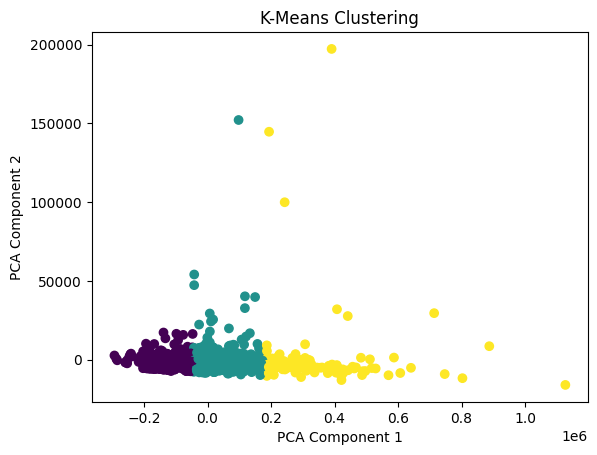

In [106]:
#plot
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.show()


In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]  # Select relevant features
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [110]:
#Make predictions
y_pred = rf_regressor.predict(X_test)
y_pred

array([-0.55912652,  1.77299246, -0.50663663, -0.06492699,  1.47547067,
       -1.31254565,  0.28554707, -0.34330464, -1.31254565, -0.80260608,
       -0.1846533 , -0.80402733, -1.12665958,  0.48696168, -0.07916858,
       -0.66763417,  0.15164969, -0.67150727, -0.64872094,  0.17104771,
       -0.4069455 ,  0.25249508, -0.24621721, -0.82898009,  0.12456548,
       -0.13078332,  0.20177819, -0.85784844,  0.10276112,  0.11154796,
       -0.67790717,  0.65783671, -0.05974537, -0.89208716,  1.26175188,
       -0.49616216, -0.26299338,  0.26516498,  1.51552618, -0.96966616,
       -0.52899409,  0.70750926, -0.84959955,  2.31317218, -0.42184458,
        0.12492058, -0.69796146, -0.79003923,  2.74764304, -0.41319115,
       -0.74161027,  0.0059032 , -0.8060395 ,  2.18131307, -0.51769676,
        0.90656802, -0.06830166, -0.29542416, -0.3911425 , -1.0301331 ,
       -1.25400169, -0.45730944,  1.81196758,  1.20395961,  1.41379049,
        0.69453279, -0.92469476,  1.80646297, -0.85603407, -0.14

In [111]:
#Evaluate the model:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.14273031679091522
R-squared: 0.8826425489079237


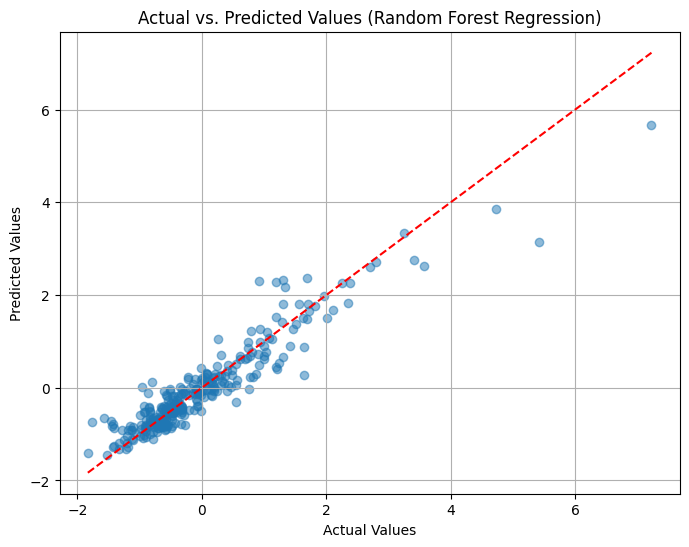

In [112]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # Create scatter plot
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Random Forest Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.grid(True)
plt.show()

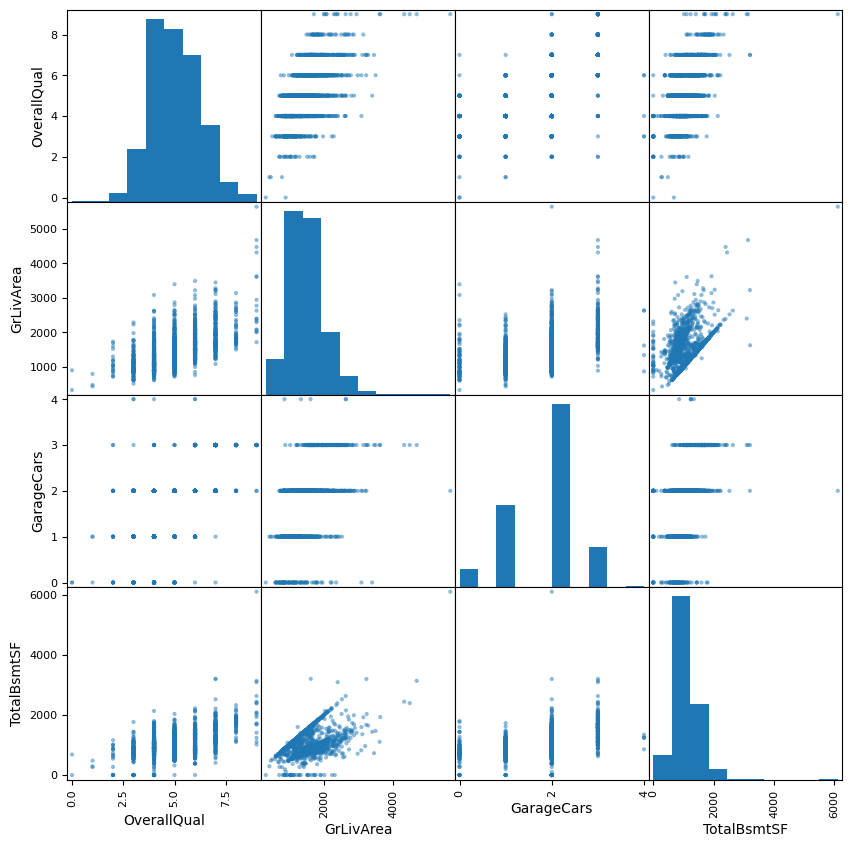

In [113]:
#Scatter Plot Matrix
from pandas.plotting import scatter_matrix # Change import statement to use pandas.plotting
names=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
scatter_matrix(df[names],figsize=(10,10))
plt.show()

In [114]:
#Classification Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [115]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.14273031679091522
Root Mean Squared Error: 0.3777966606402381
Mean Absolute Error: 0.2536037188435233
R-squared: 0.8826425489079237


In [116]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

# Assuming y_test is the scaled target variable
y_test_original = y_test  # If y_test is already scaled, you might need to reverse the scaling here

# Discretize the target variable
y_test_discretized = pd.qcut(y_test_original, q=5, labels=False)

# Convert y_pred to probabilities using a classifier or other suitable method
# Here's an example using LabelBinarizer, but you might need a different approach
# depending on how you want to define your classes:

# Initialize LabelBinarizer
lb = LabelBinarizer()

# Fit LabelBinarizer on discretized target variable
lb.fit(y_test_discretized)

# Transform y_pred to probabilities
y_pred_probs = lb.transform(y_pred.astype(int))  # Convert y_pred to integers for binarization

# Calculate log loss
logloss = log_loss(y_test_discretized, y_pred_probs, labels=np.unique(y_test_discretized))
print(logloss)

30.859292285203033


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


In [117]:
logloss = log_loss(y_test_discretized, y_pred_probs, labels=np.unique(y_test_discretized))
print(logloss)

30.859292285203033


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


In [118]:
#Linear  Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [119]:
# Instead of Logistic Regression, use a regression algorithm like Linear Regression:
from sklearn.linear_model import LinearRegression  # Import LinearRegression

regressor = LinearRegression()  # Create a LinearRegression object
regressor.fit(X_train, y_train)  # Fit the model
y_pred = regressor.predict(X_test)  # Make predictions

# Evaluate the model using appropriate metrics for regression:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.25415705596466115
R-squared: 0.7910239048318478


In [120]:
# Instead of Logistic Regression, use a regression algorithm like Linear Regression:
from sklearn.linear_model import LinearRegression  # Import LinearRegression

regressor = LinearRegression()  # Create a LinearRegression object
regressor.fit(X_train, y_train)  # Fit the model
y_pred = regressor.predict(X_test)  # Make predictions

# Evaluate the model using appropriate metrics for regression:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.25415705596466115
R-squared: 0.7910239048318478


In [129]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [130]:
y_discretized = pd.qcut(y, q=5, labels=False)


In [131]:
# Split data with the discretized target variable
X_train, X_test, y_train_discretized, y_test_discretized = train_test_split(
    X, y_discretized, test_size=0.2, random_state=42
)

In [133]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train_discretized)


GaussianNB()

In [136]:
# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

In [137]:
# Evaluate the model
accuracy = accuracy_score(y_test_discretized, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6232876712328768


In [138]:
# Classification Report
print("Classification Report:\n", classification_report(y_test_discretized, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        67
           1       0.56      0.57      0.56        69
           2       0.41      0.36      0.38        45
           3       0.53      0.75      0.62        52
           4       0.89      0.71      0.79        59

    accuracy                           0.62       292
   macro avg       0.63      0.61      0.61       292
weighted avg       0.64      0.62      0.62       292



In [141]:
#Classification and Regression Trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [142]:
x=df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]
y=df['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [144]:
model = DecisionTreeClassifier(random_state=42)


In [145]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [146]:
y_pred = model.predict(X_test)

In [149]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.2423547760179627
R-squared: 0.8007281185039065
Root Mean Squared Error: 0.4922954153940119
Mean Absolute Error: 0.33397602250902764


In [152]:
#Data Preparation and Modeling Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [153]:

   # Create an imputer to fill missing values with the mean
   imputer = SimpleImputer(strategy='mean')

   # Fit the imputer to your training data and transform it
   X_train_imputed = imputer.fit_transform(X_train)
   X_test_imputed = imputer.transform(X_test)

In [155]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder to your training data and transform it
# Assuming 'categorical_column_name' is a placeholder for the actual categorical column
X_train_encoded = encoder.fit_transform(X_train[['OverallQual']])  # Replace 'categorical_column_name'
X_test_encoded = encoder.transform(X_test[['OverallQual']])    # Replace 'categorical_column_name'

In [160]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [161]:
#Create a Pipeline:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


In [162]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [163]:
y_pred = pipeline.predict(X_test)

In [164]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.7540690839921591
R-squared: 0.3799801777621411


In [165]:
# Save Model Using Pickle
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [166]:
#Finalize Your Model with Joblib
import joblib
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [167]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8007281185039065
